(matplotlib)=
# Introducción a matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)

Matplotlib es una de las prncipales bibliotecas para gráficos y visualización de datos dentro del ecosistema python en Ciencia de los Datos. Vamos a ver una mínima introducción, esperando que características más avanzadas sean investgadas por el propio lector/a, cuando las vaya necesitando.

Existen varias maneras de usr matplotlib, pero una de las más comunes es a través de pyplot, que nos permitirá una interacción similar a la que se tiene en el sistema MATLAB. 

In [3]:
import matplotlib.pyplot as plt

El siguiente comando nos permite integrarlo en un notebook de Jupyter, y las imágenes saldrán integradas dentro del notebook, bajo la celda que la cree.

Como aperitivo, veamos cómo hacer tres gráficas en una sola figura. En el comenterio correspondiente damos una breve explicación de lo que hace cada comando:

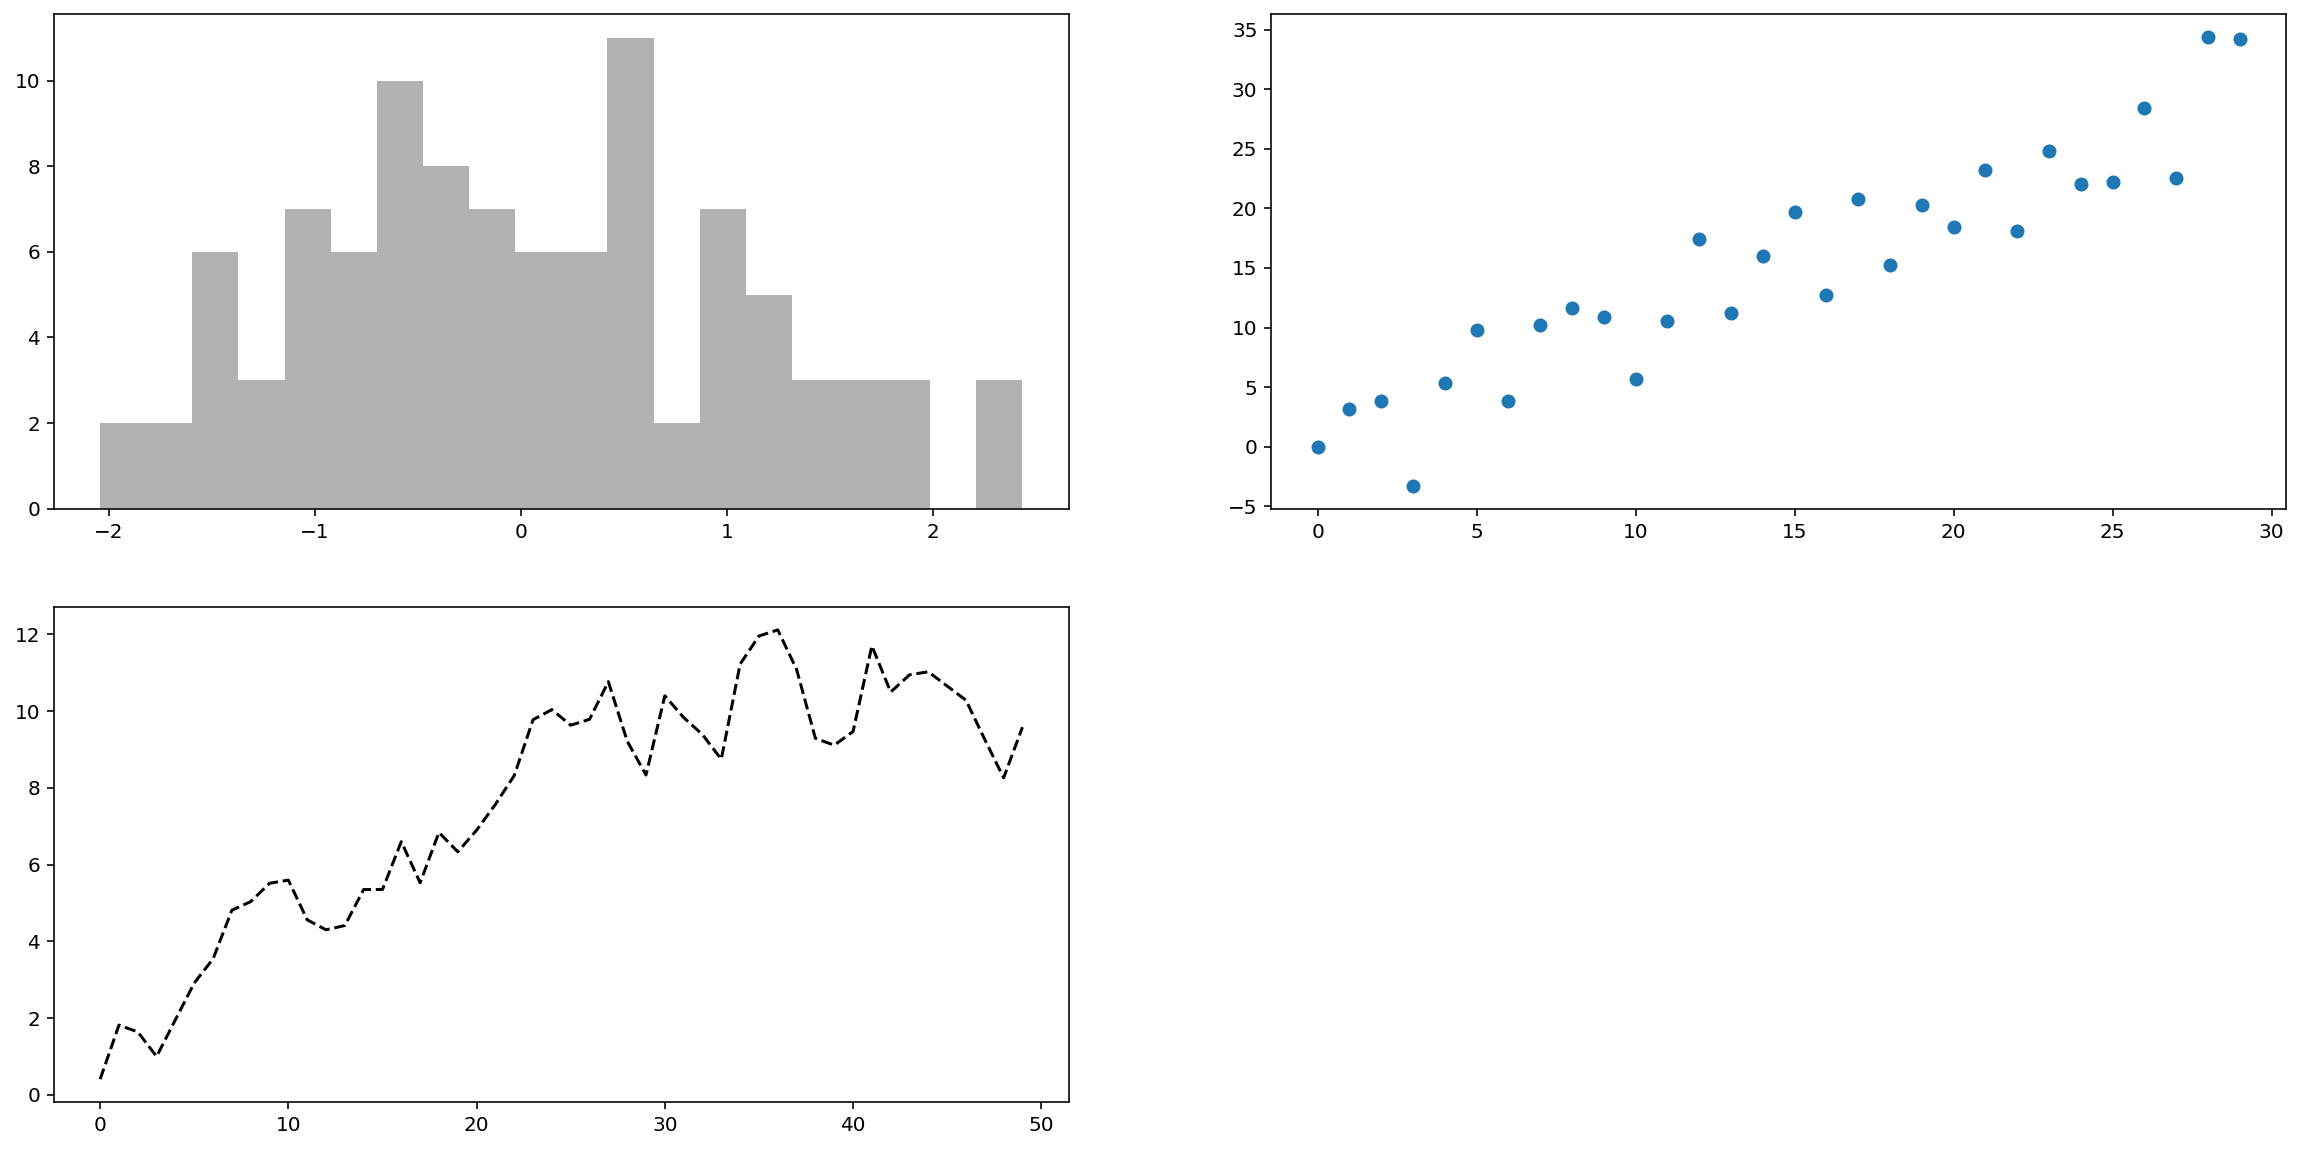

In [4]:
fig = plt.figure() # Se crea una figura (el contenedor de los tres gráficos)
ax1 = fig.add_subplot(2, 2, 1) # En una rejilla 2x2, se crea la primera caja (axes)
ax2 = fig.add_subplot(2, 2, 2) # La segunda caja
fig.add_subplot(2, 2, 3) # La tercera caja


# En la tercera caja (la activa en este momento) dibujamos la gráfica de una función, 
# mediante el método plot
plt.plot(np.random.randn(50).cumsum(), 'k--') 

# Volvemos a la segunda caja, usando el objeto asociado correspondiente, y dibujamos un
# histograma con el método hist
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) 
            
# En la tercera caja, colocamos una nube de puntos con el método scatter    
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) 

## Dos interfaces posibles

En el ejemplo anterior hemos mezclados dos "estilos" al crear las gráficas. La gráfica de la tercera caja se crea al ser en ese momento el "subplot" activo. Sin embargo, los dos primeros subplots se han "rellenado" a través del objeto correspondiente (ax1 y ax2). Comentemos con algo más de detalle estos dos estilos: 

### Estilo "MATLAB"

 Basado en `plt` y conocido como "estilo MATLAB", crea la figura y cada uno de los subplots, aplicándose los cambios al último creado en cada momento, que es el que está activo. 

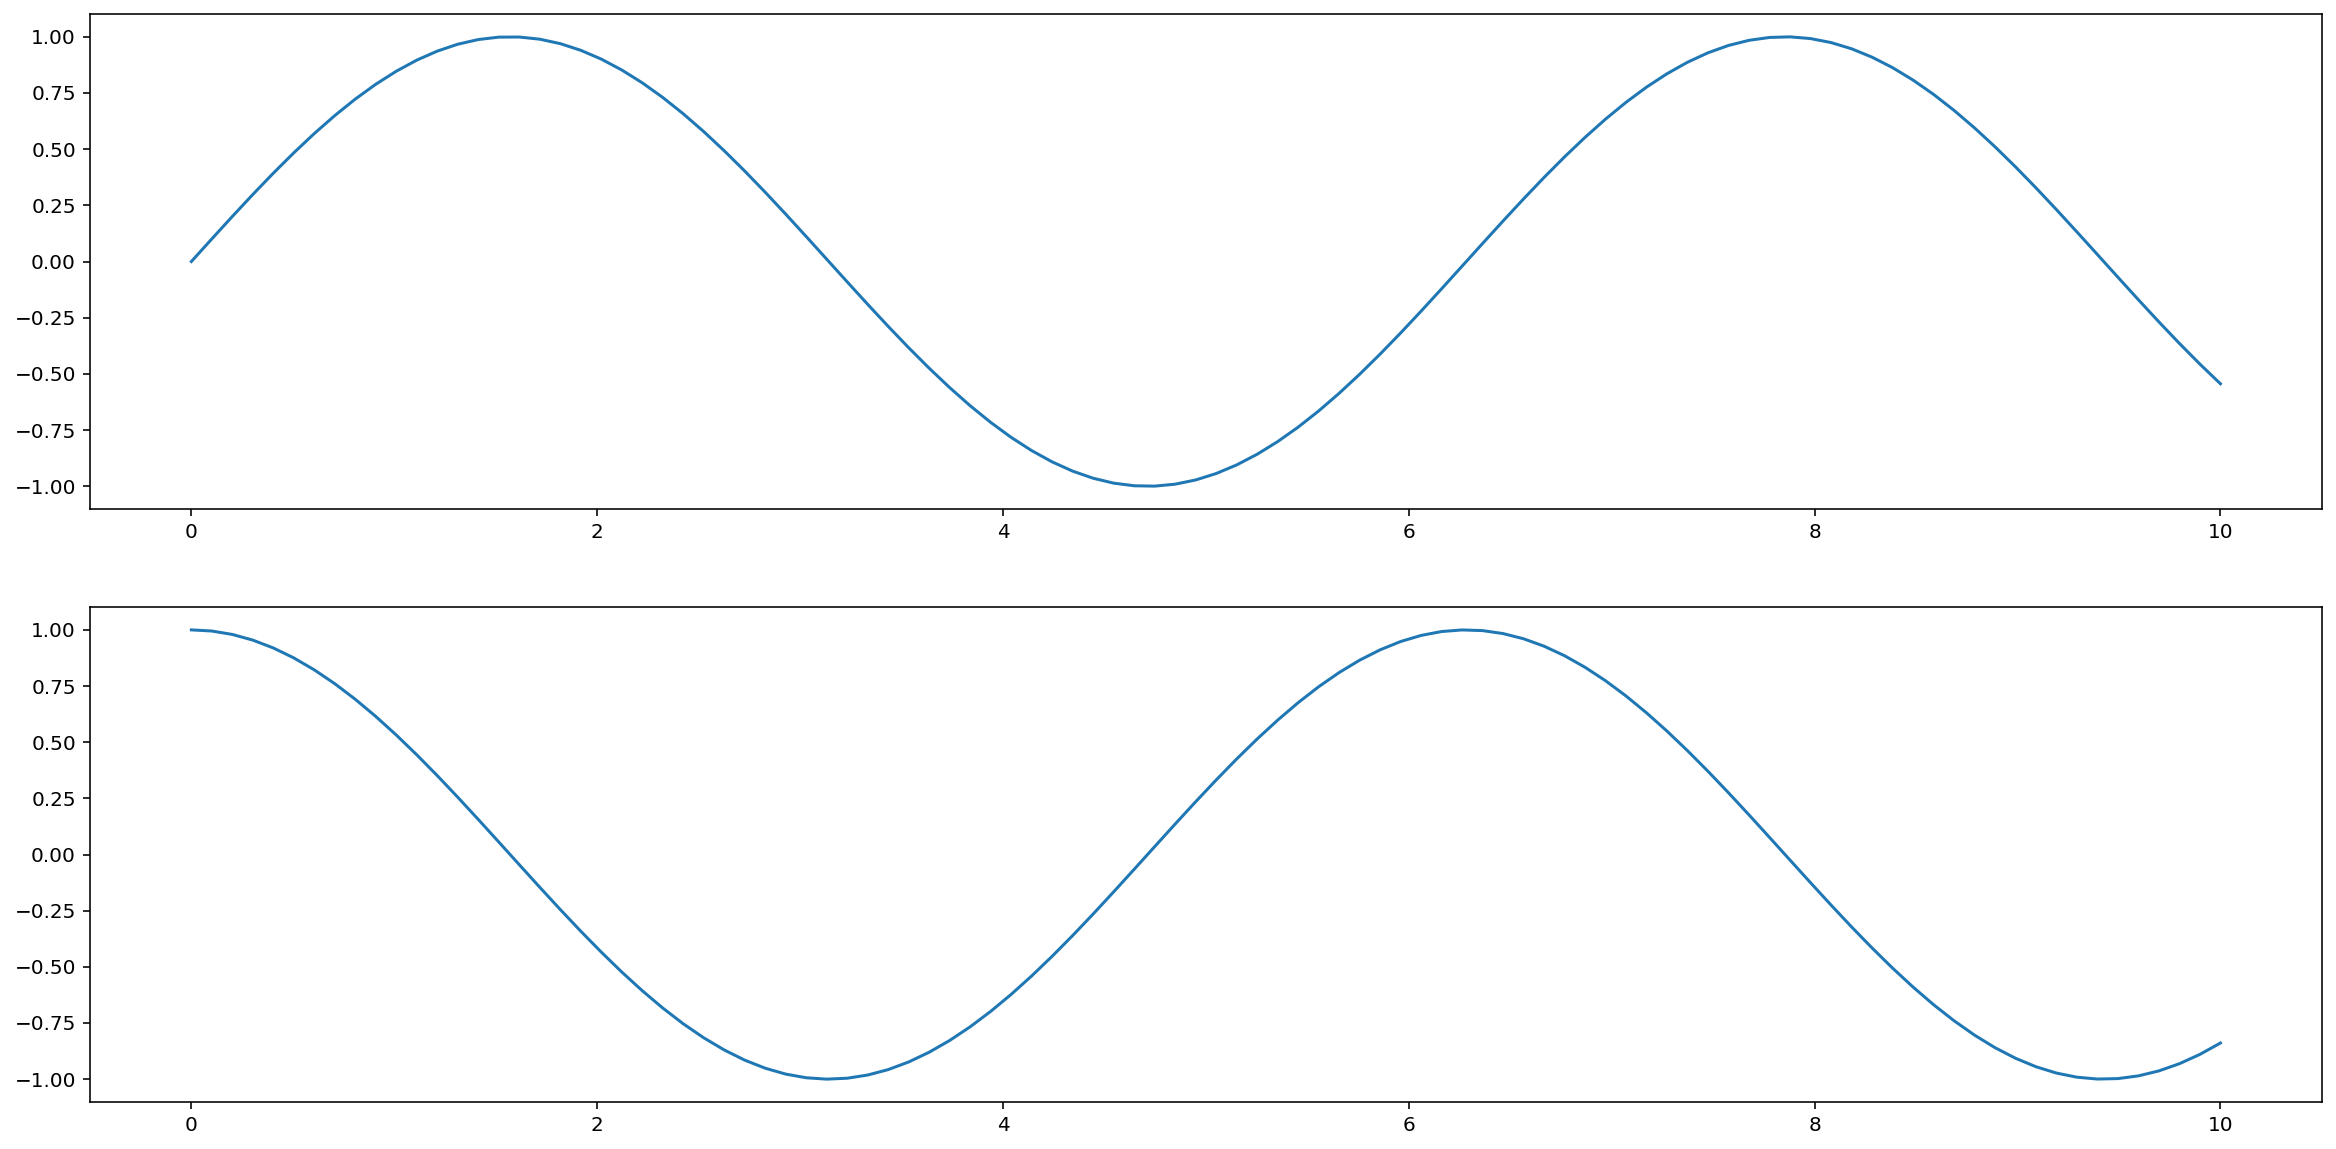

In [5]:
x = np.linspace(0, 10, 100)

plt.figure()  # crea figura

# crea la primera de las dos subfiguras y hace un plor de la fucnión seno
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create la segunda y hace un plot del coseno
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Inconveniente: una vez estamos en el segundo subplot, ¿cómo podemos volver a hacer algo con el primero? En el estilo basado en objetos que explicamos a continuación esto sí es posible.

### Estilo basado en objetos 

En este caso, sin tener que depender del último objeto activo, los procedimientos de creación de gráficas son métodos de objetos de tipo `Figure` y `Axes`, que se crean al principio, y los cuales "manipulamos" con sus métodos. 

Un objeto de tipo `Figure` se tiene que pensar como un contenedor donde creamos gráficos. Los Los `Axes` son los distintos gráficos dentro de una figura: cajas con marcas y etiquetas y eventualmente con el gráfico de alguna función, por ejemplo. 

Vamos a repetir los dos gráficos antriores, pero al estilo basado en objetos.

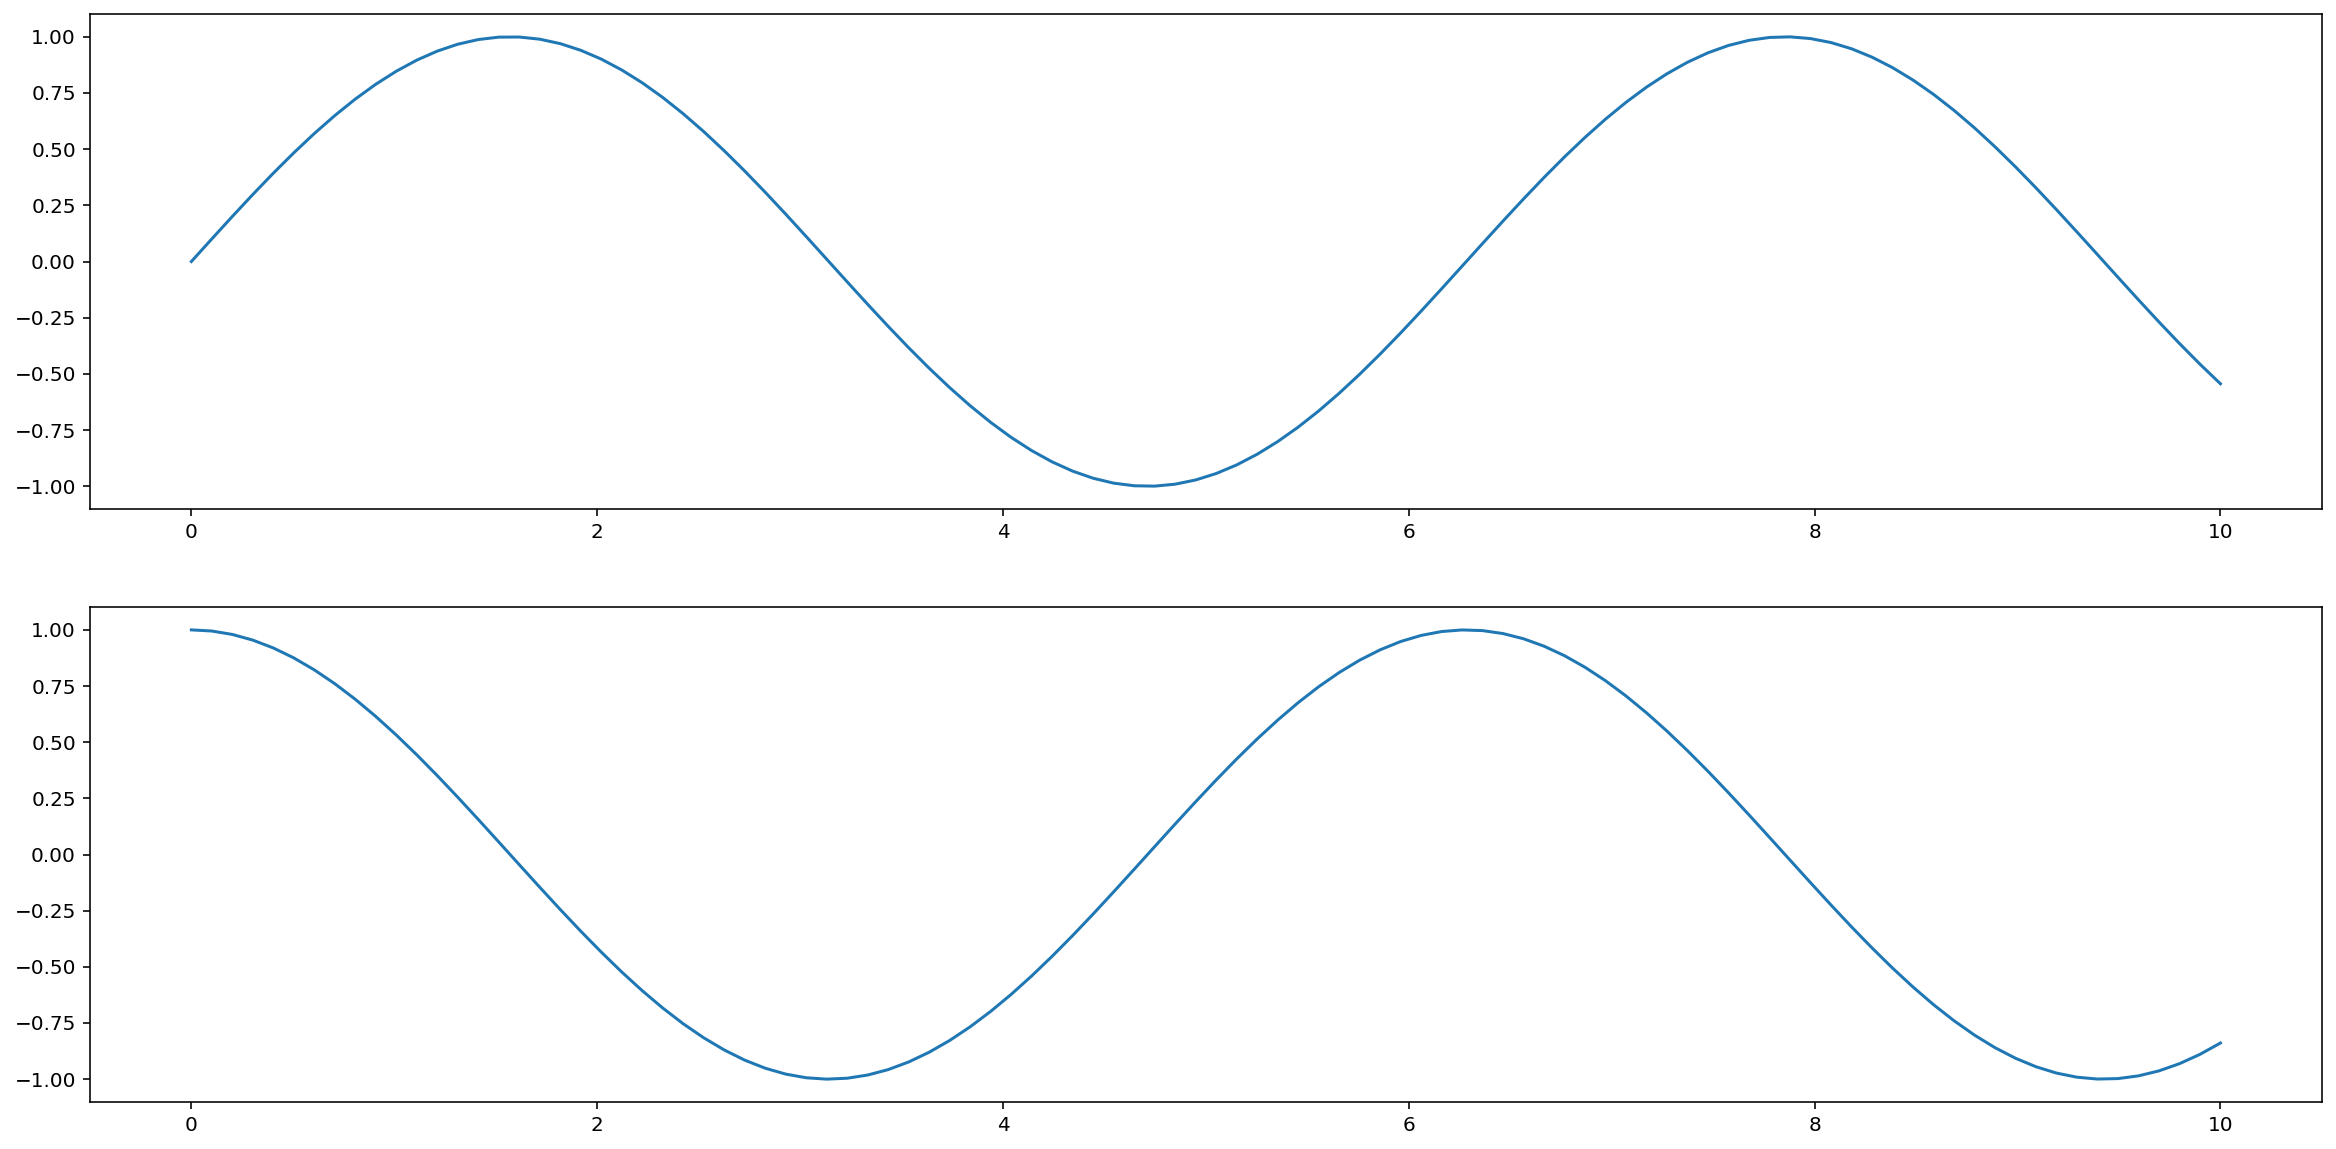

In [6]:
fig, ax = plt.subplots(2) # de esta manera fig es un objeto Figure y 
                          # ax es un array con dos objetos 'Axes' 

# Llamamso al método plot sobre cada uno de los objetos de tipo Axes
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Gráficas simples con *plot*

Con `plot` creamos una gráfica de una función $y=f(x)$. 

Un ejemplo muy simple:

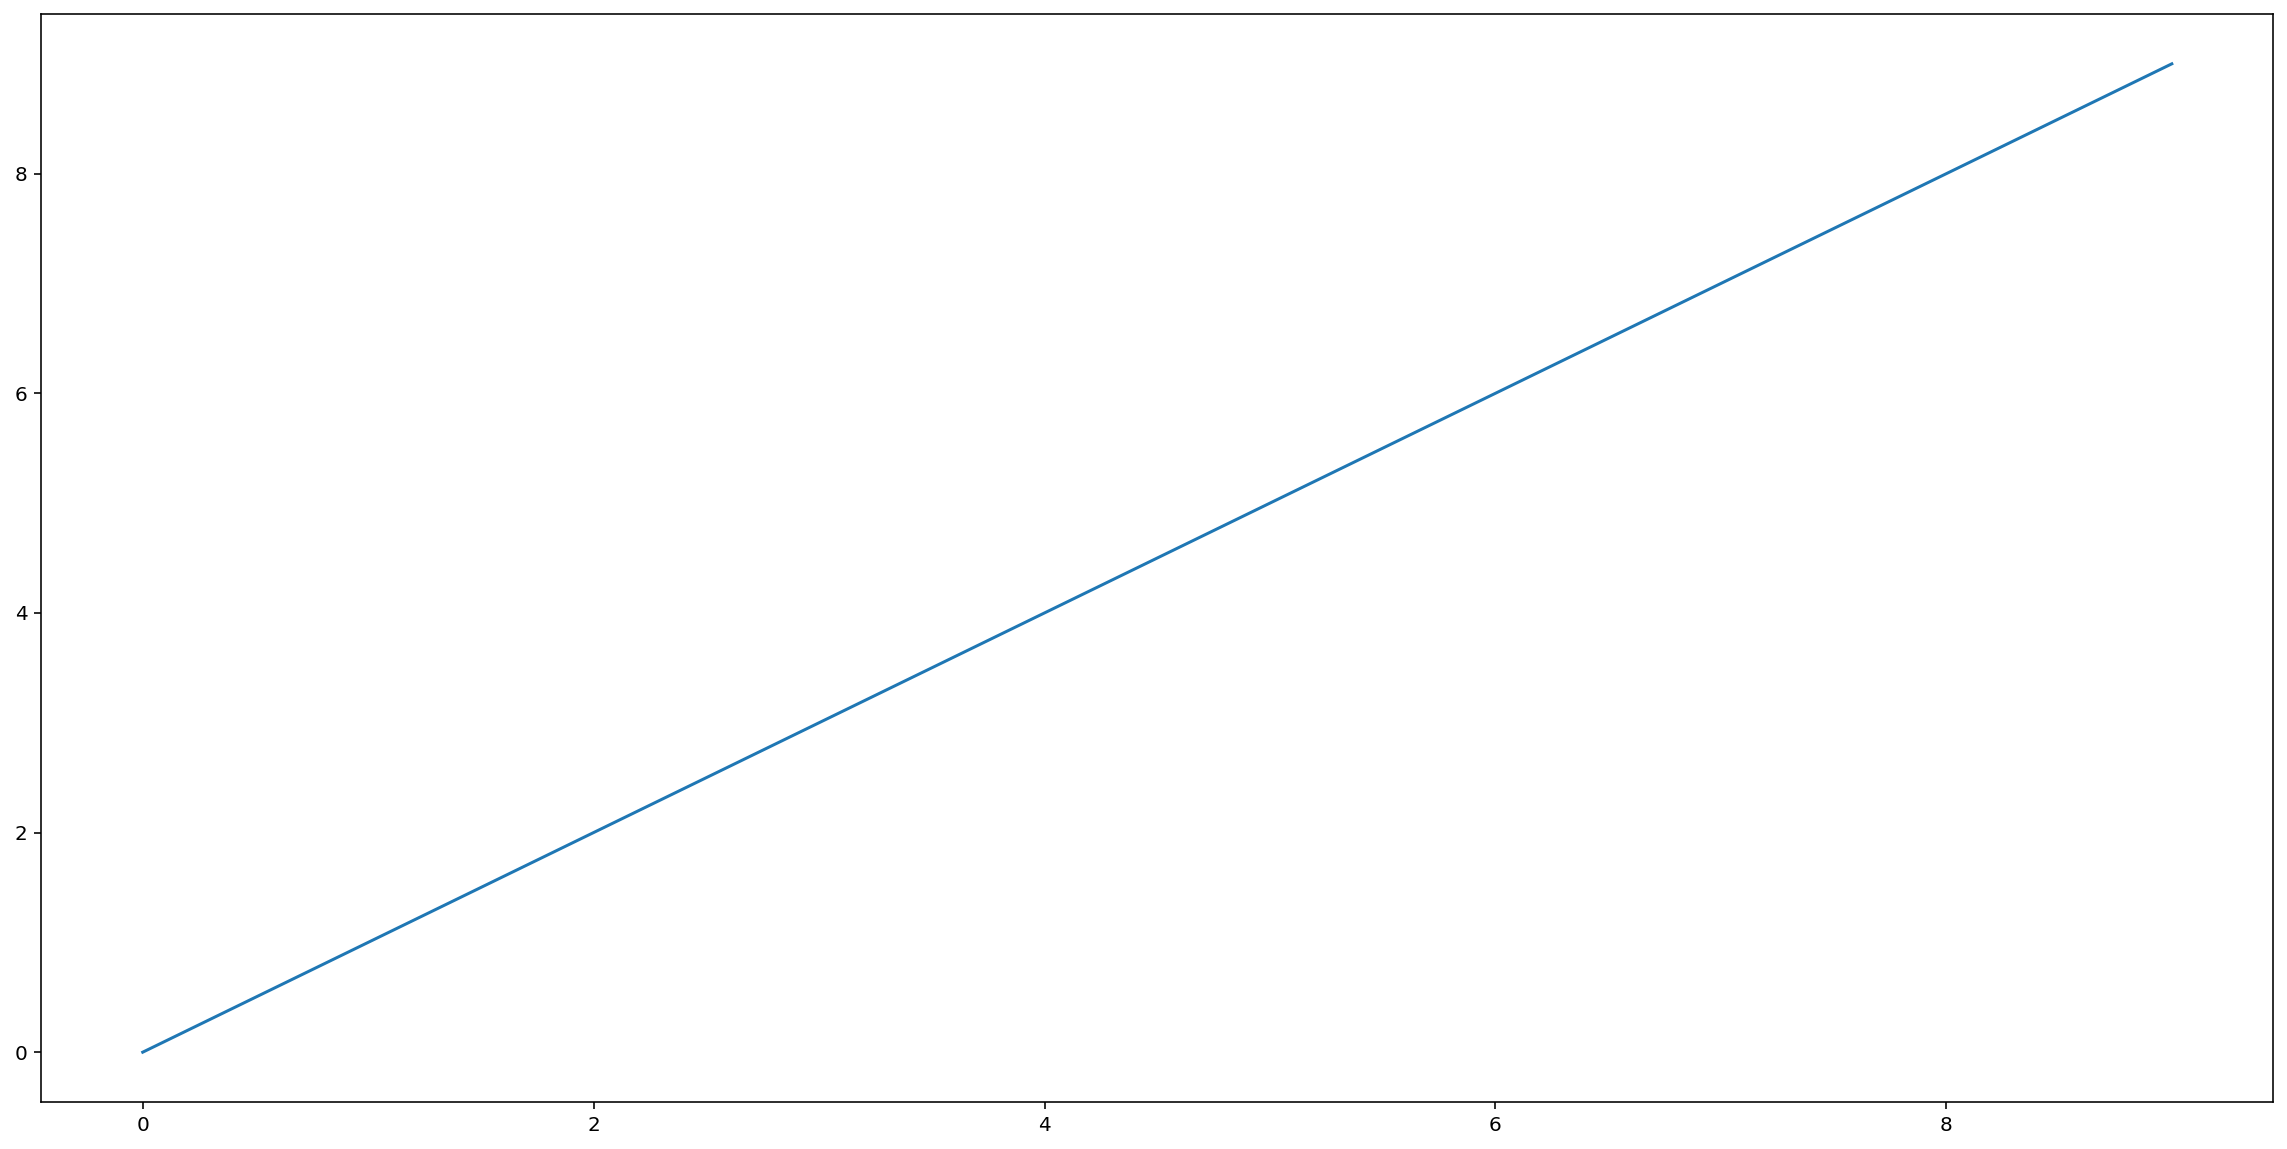

In [7]:
plt.plot(np.arange(10))

En este caso, nuestra variable dependiente (la `y`) toma valores en los primeros diez números. Por defecto, si no se da los valores de la variable independiente (la `x`), entonces se toma por defecto el corresponiente rango. Por tanto, en este caso la recta representa la función $y=x$ 

Repetimos ahora la gráfica anterior de la funciónj seno:

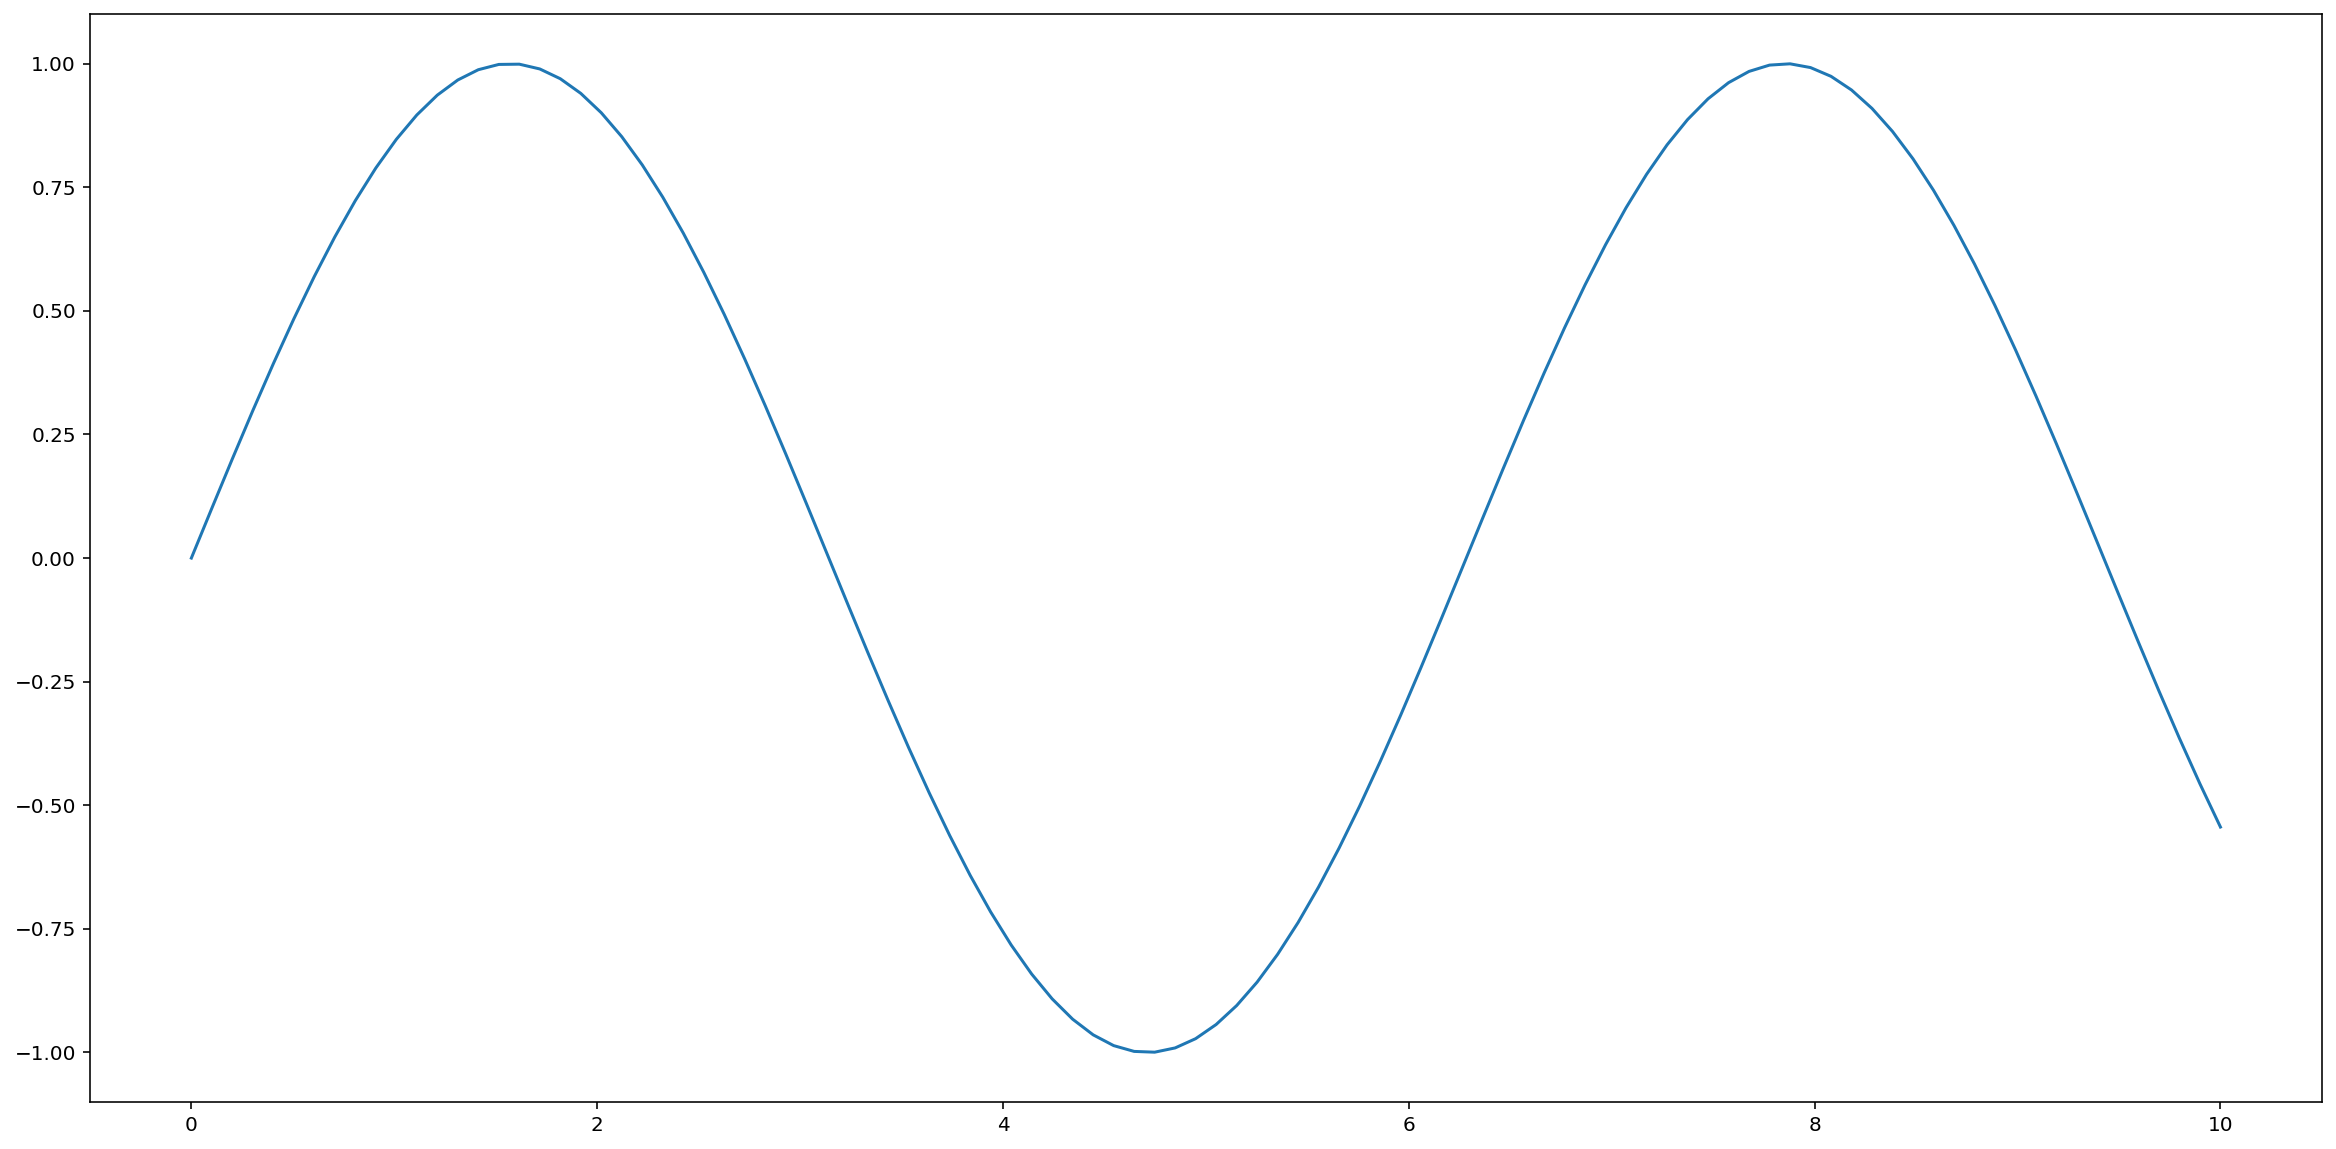

In [8]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

Podemos tener dos gráficas dentro de la misma caja, basta con llamar dos veces a `plt`:

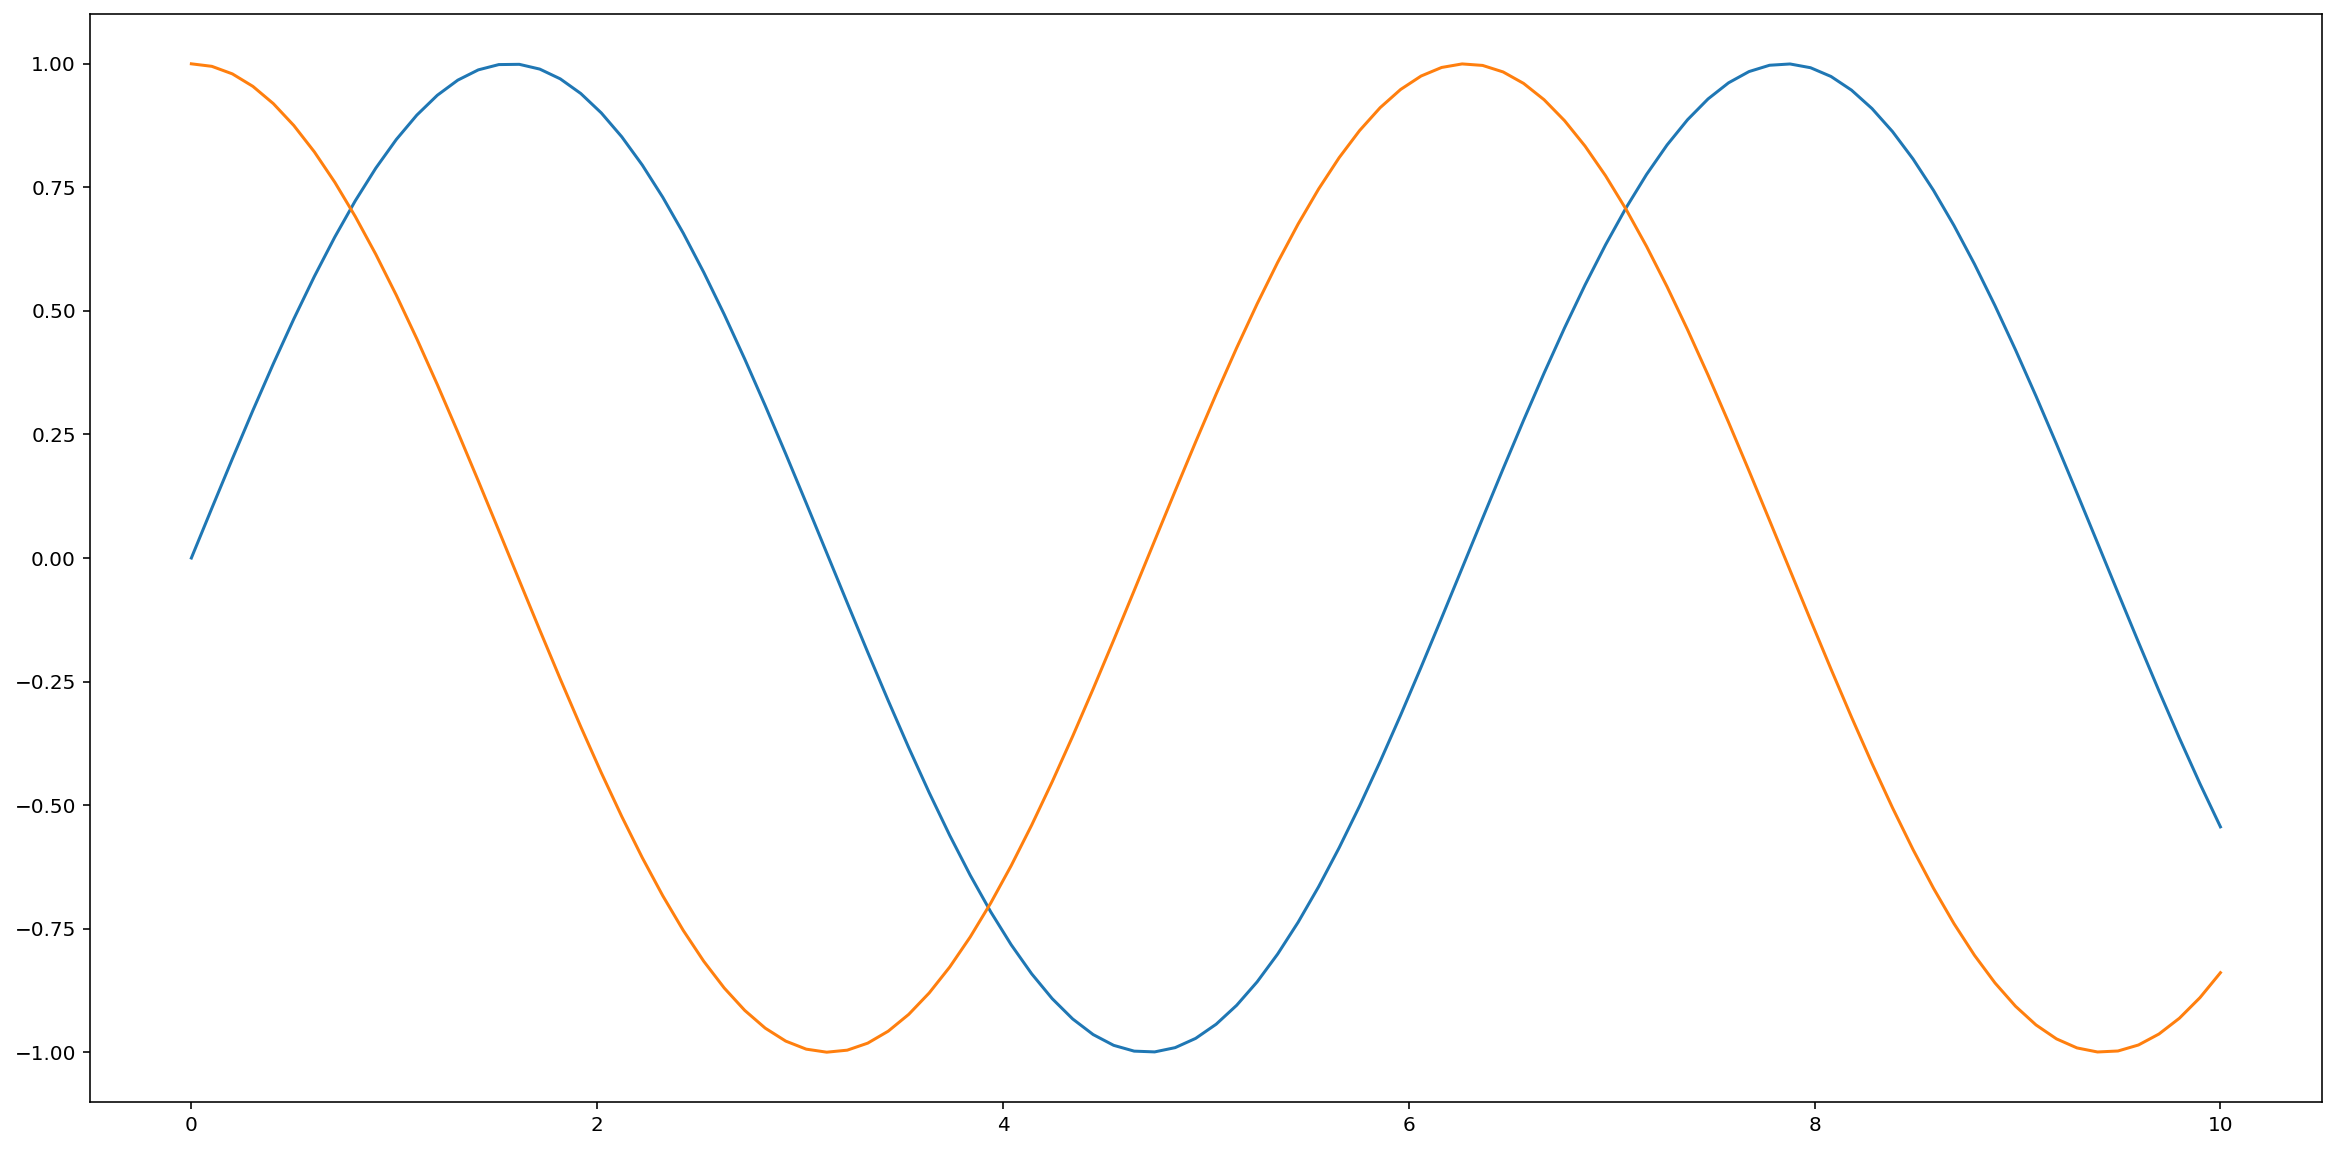

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

El color de las gráficas se ajusta automáticamente, pero se puede indicar mediante el parámetro `color`de `plot`. He aquí unos cuantos ejemplos:

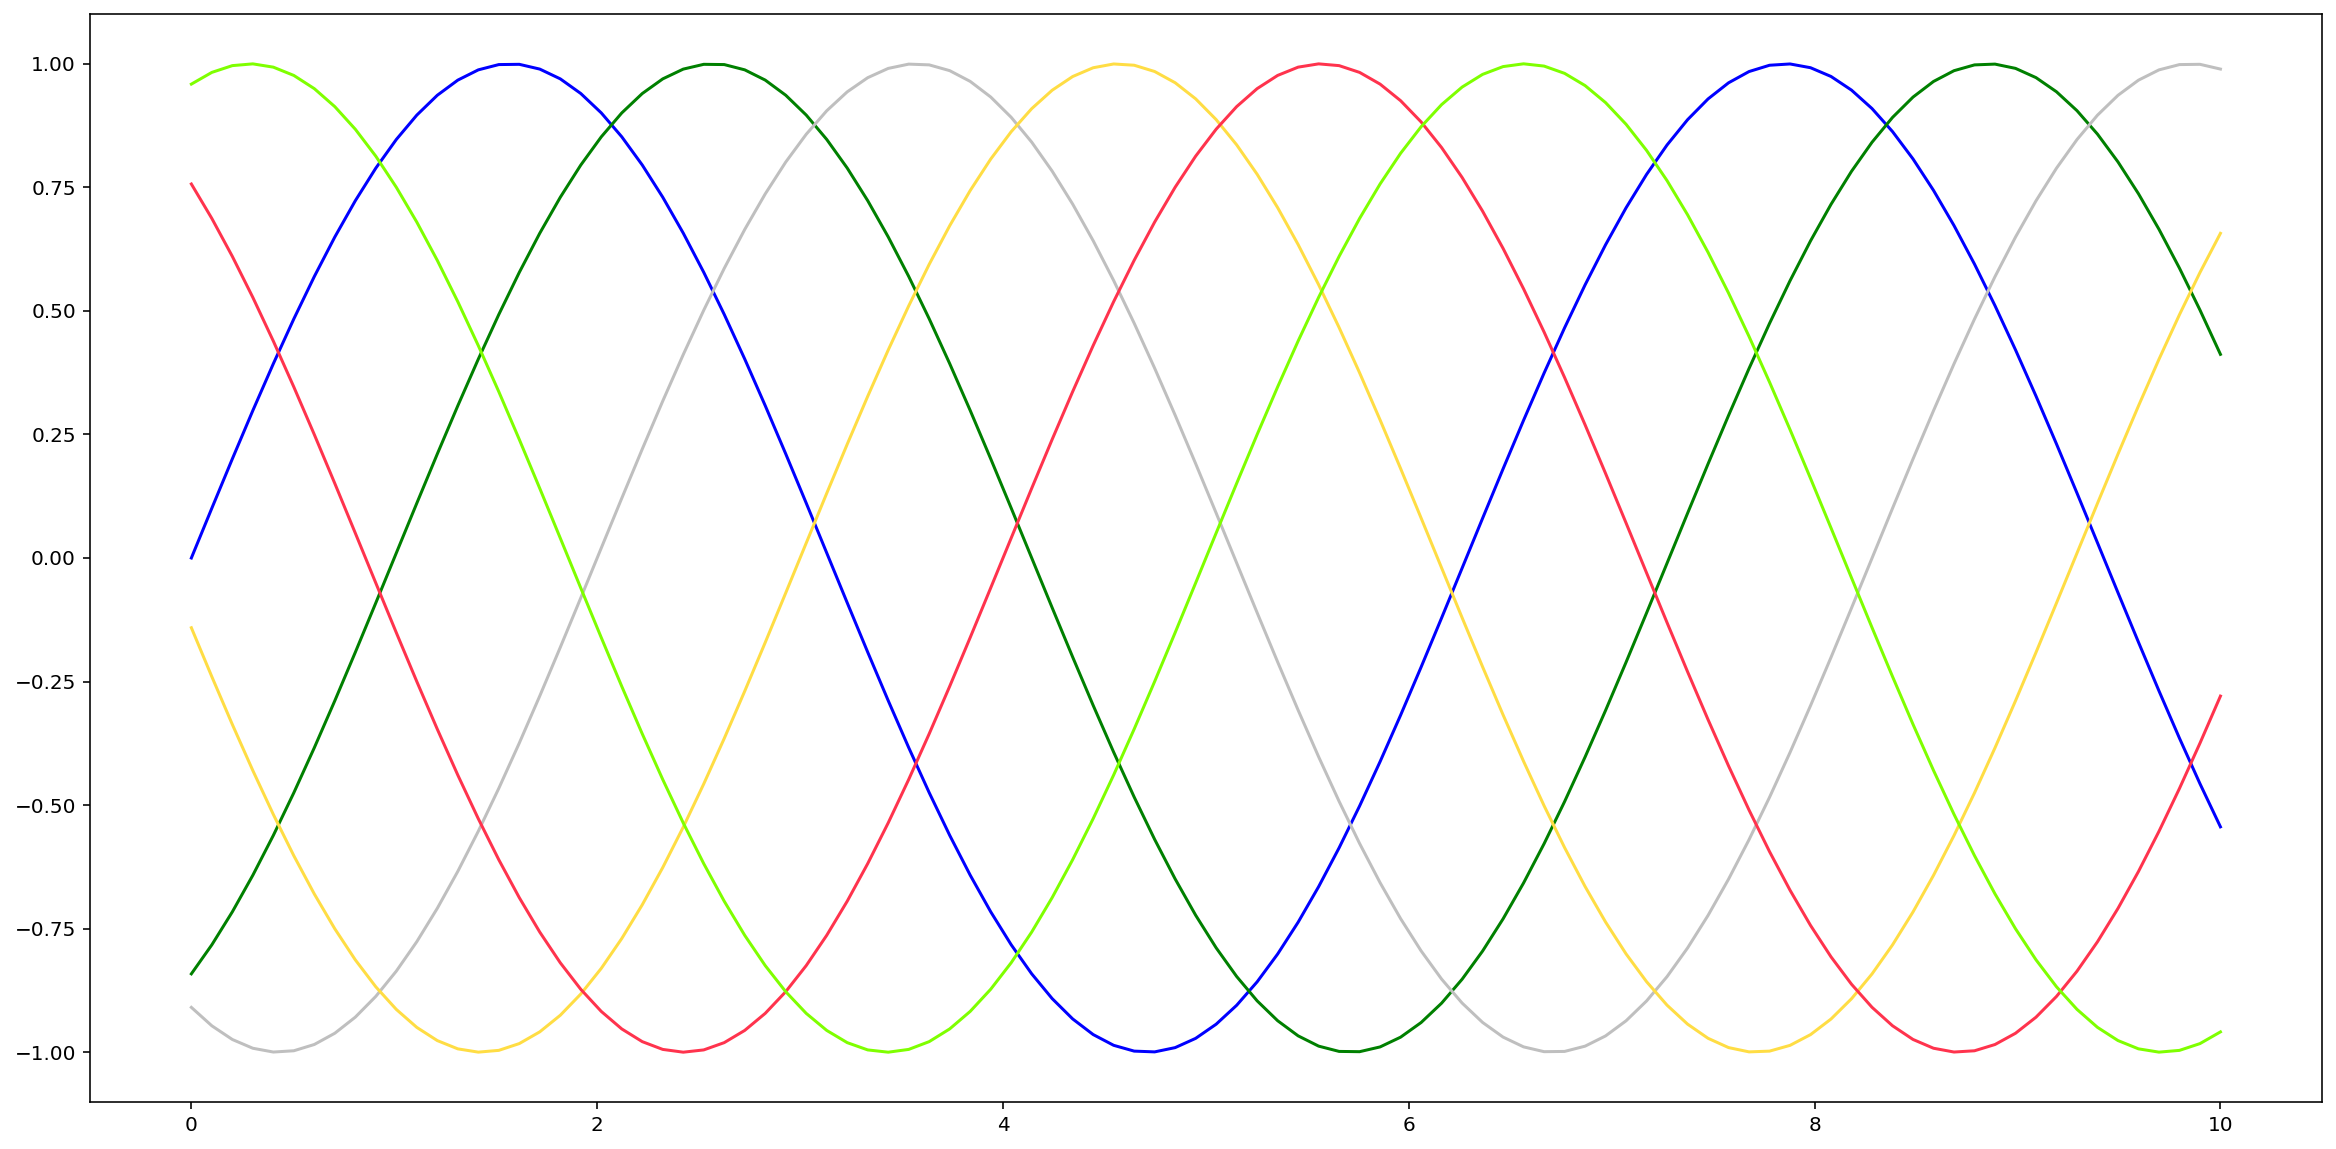

In [10]:
plt.plot(x, np.sin(x - 0), color='blue')        # por nombre de color
plt.plot(x, np.sin(x - 1), color='g')           # código corto del color (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Escala de grises entre 0 y 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex código (RRGGBB desde 00 s FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tupla, valores 0 a 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # colores soportados por HTML

De igual manera, el estilo de dibujo de cada línea se puede dar con `linestyle`. Aquí algunos ejemplos:


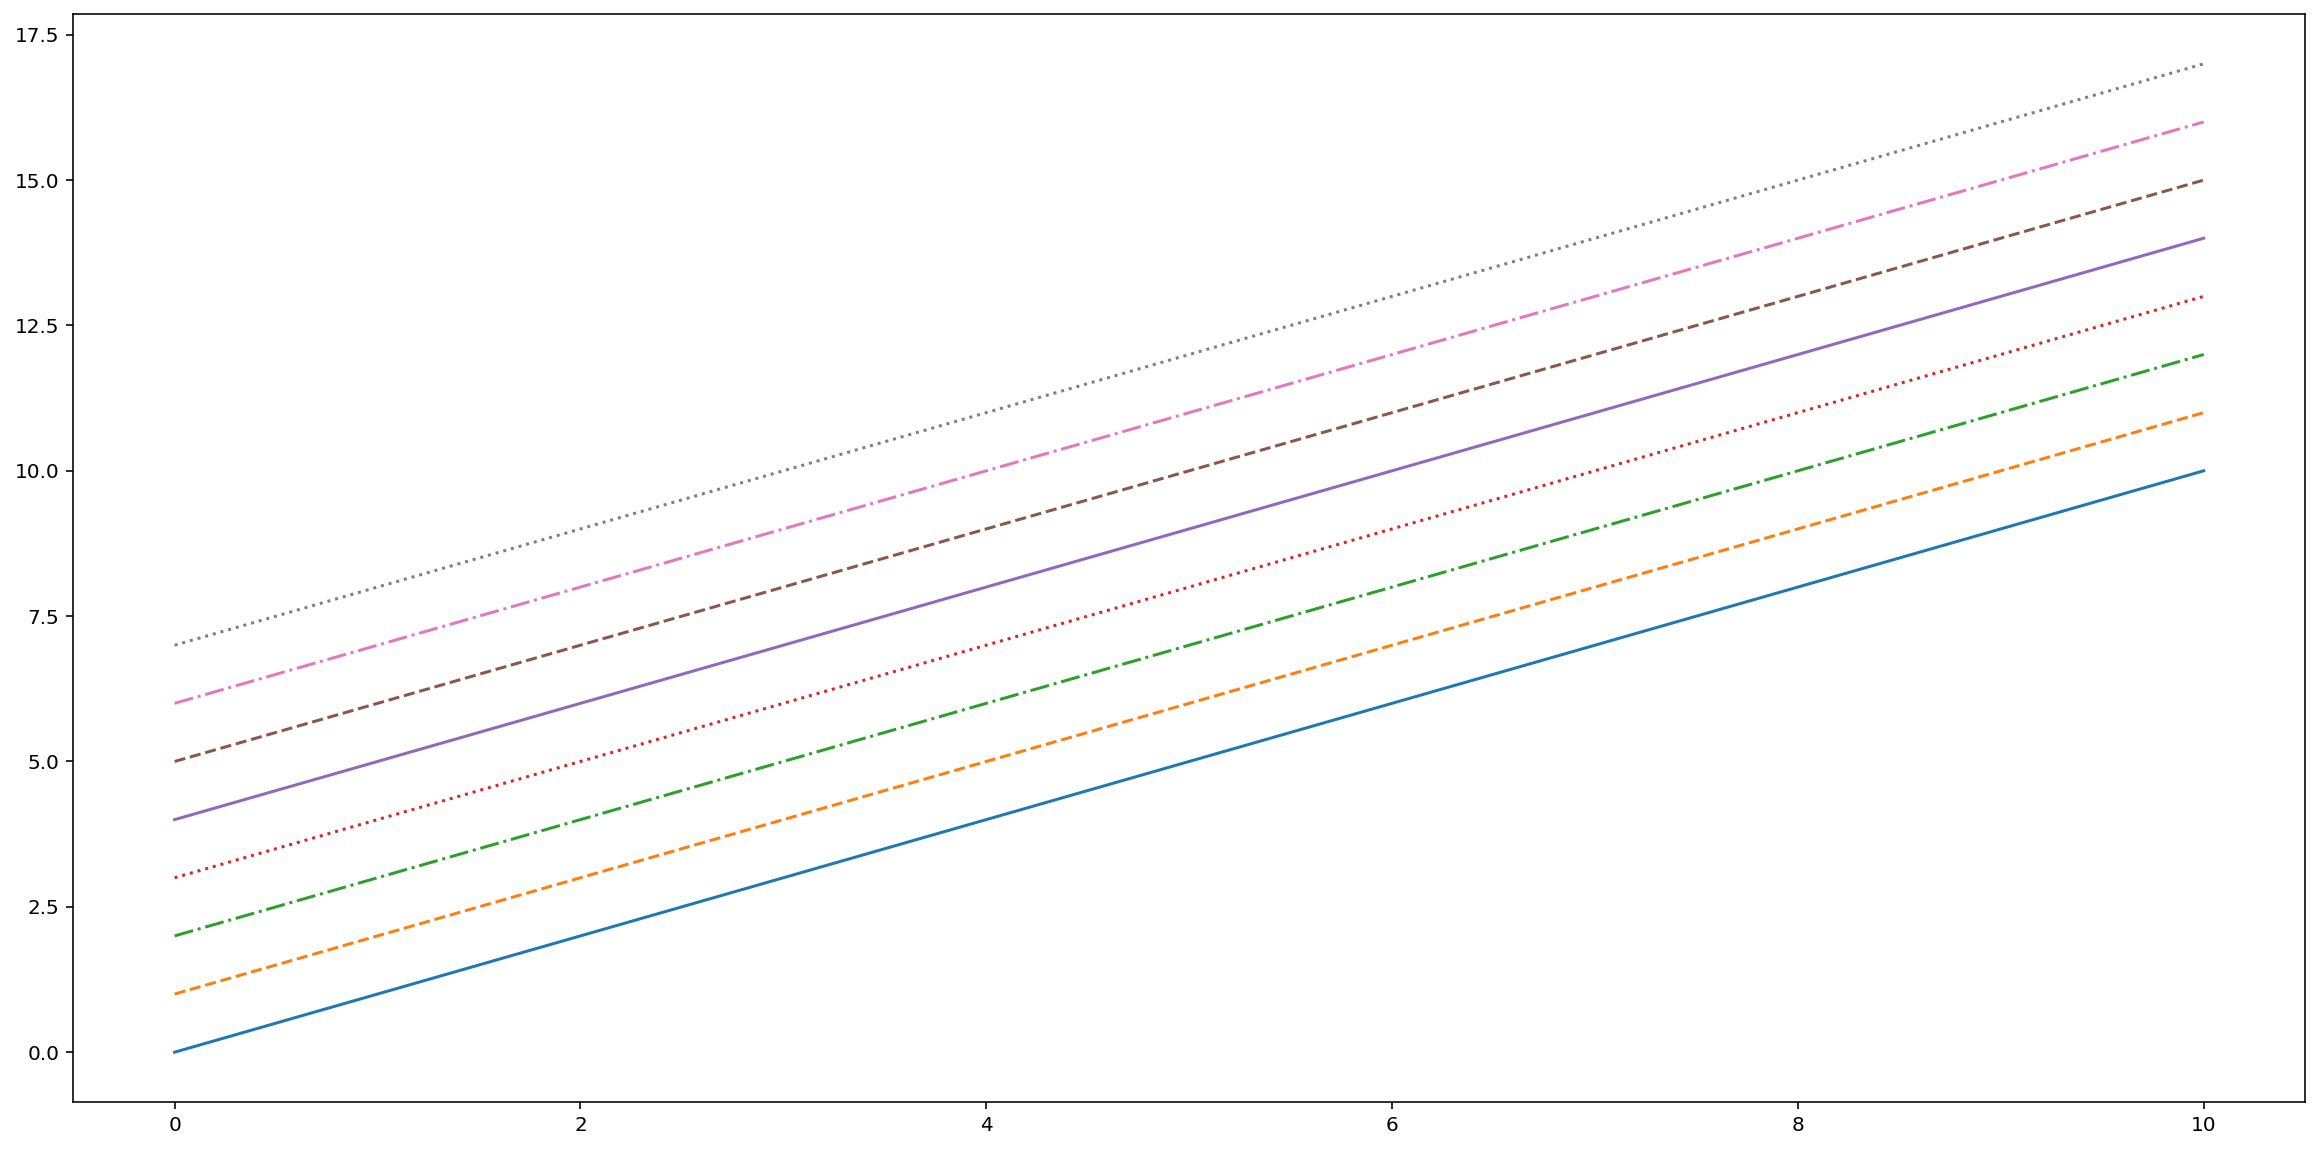

In [11]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Códigos cortos para lo mismo
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Los códigos cortos sirven para de manera compacta indicar todas estas caracterñisticas. Por ejemplo, conjuntamente el color y el estilo de línea:

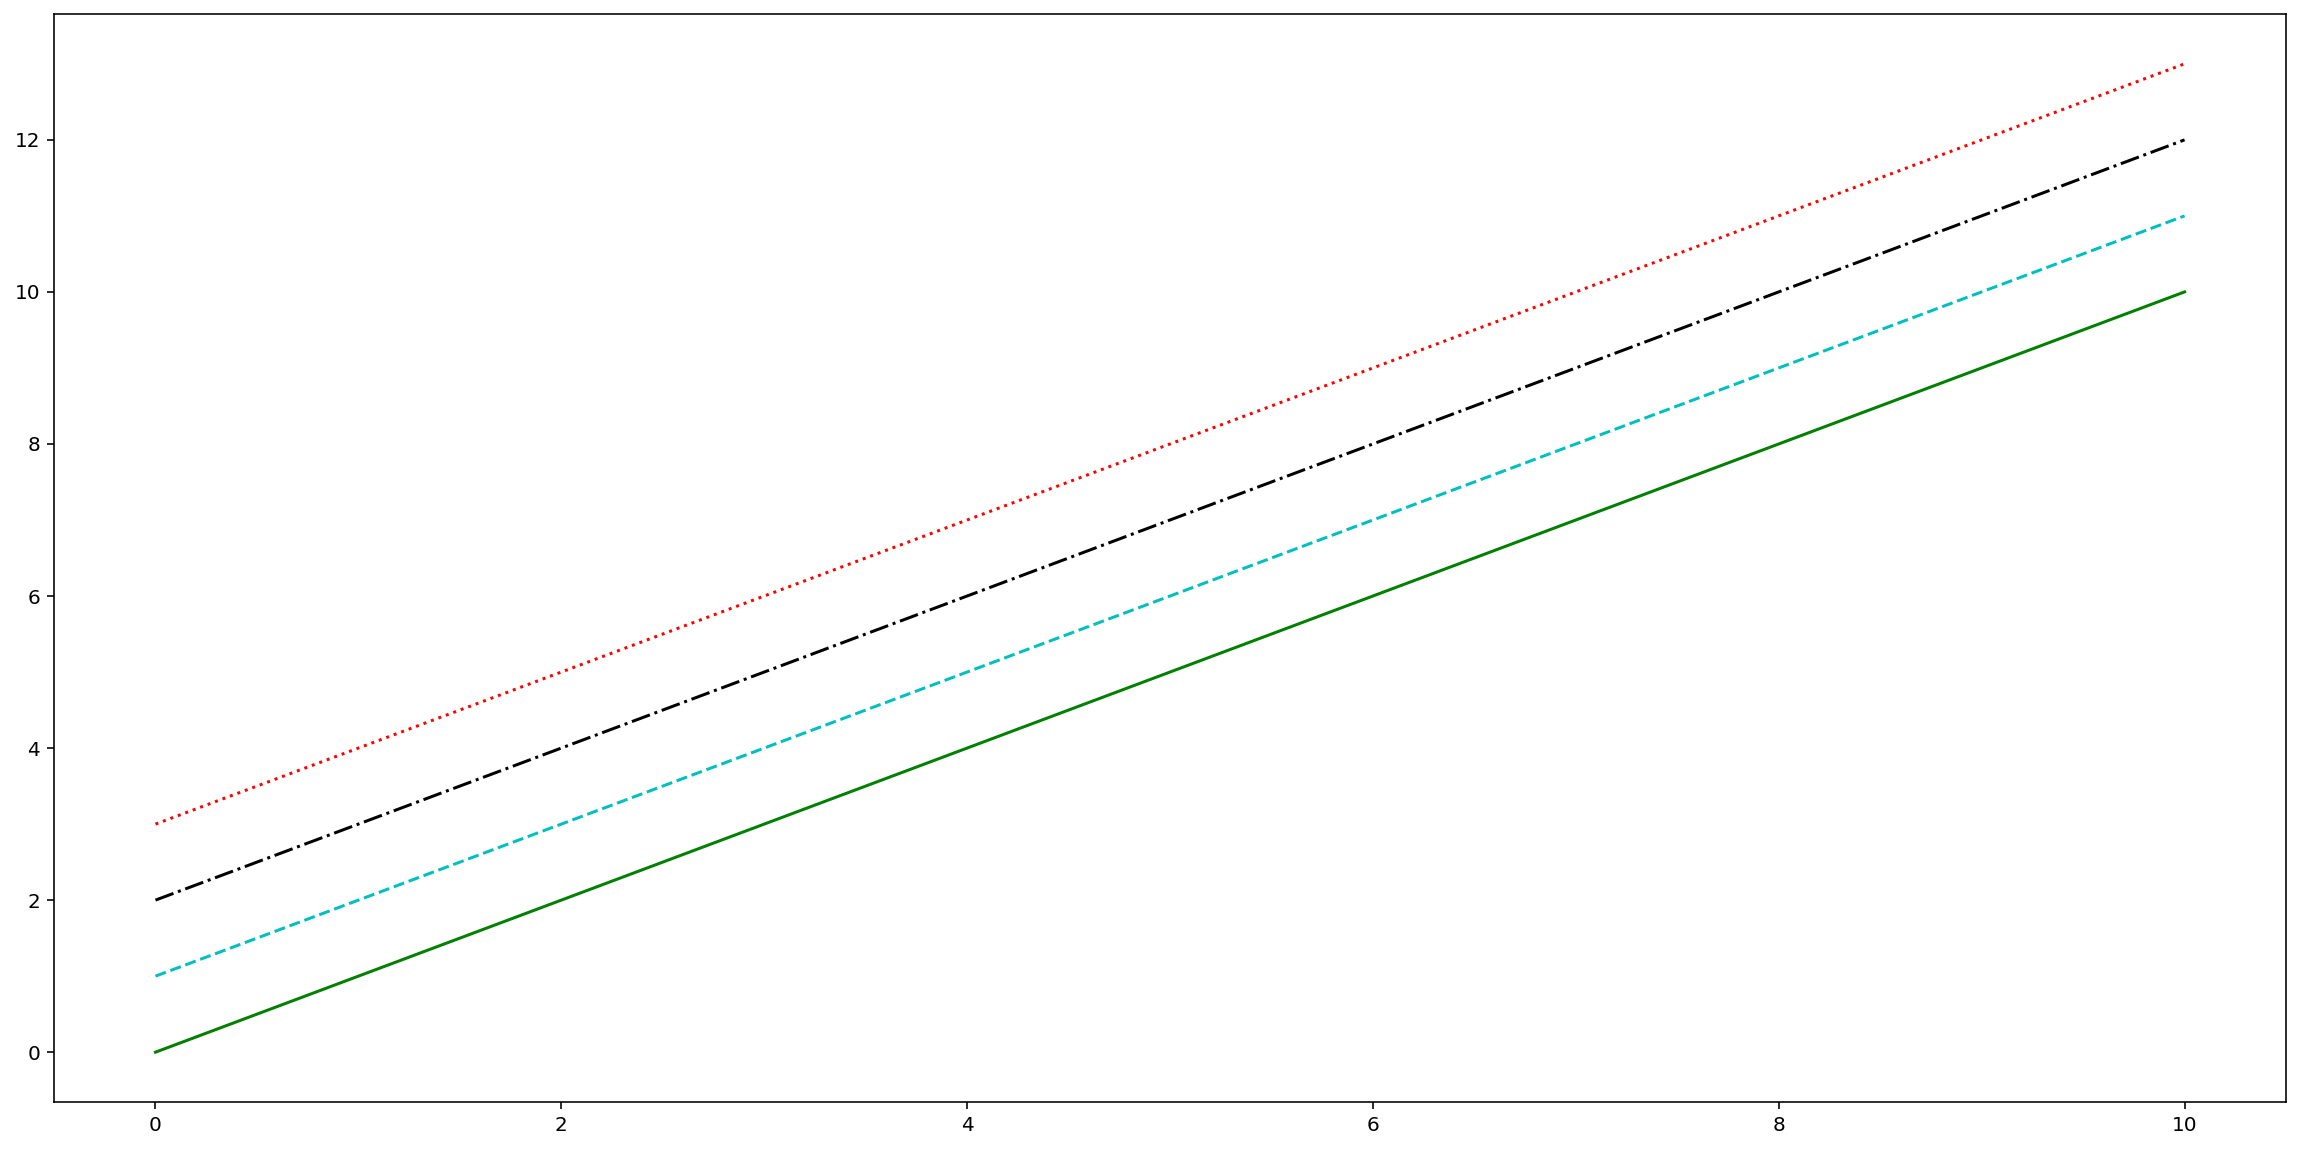

In [12]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Aunqe plot deduce bastabte bien los límites de la gráfica, es posible especificar estos límites con `xlim` y `ylim`, com en el ejemplo:

(-1.5, 1.5)

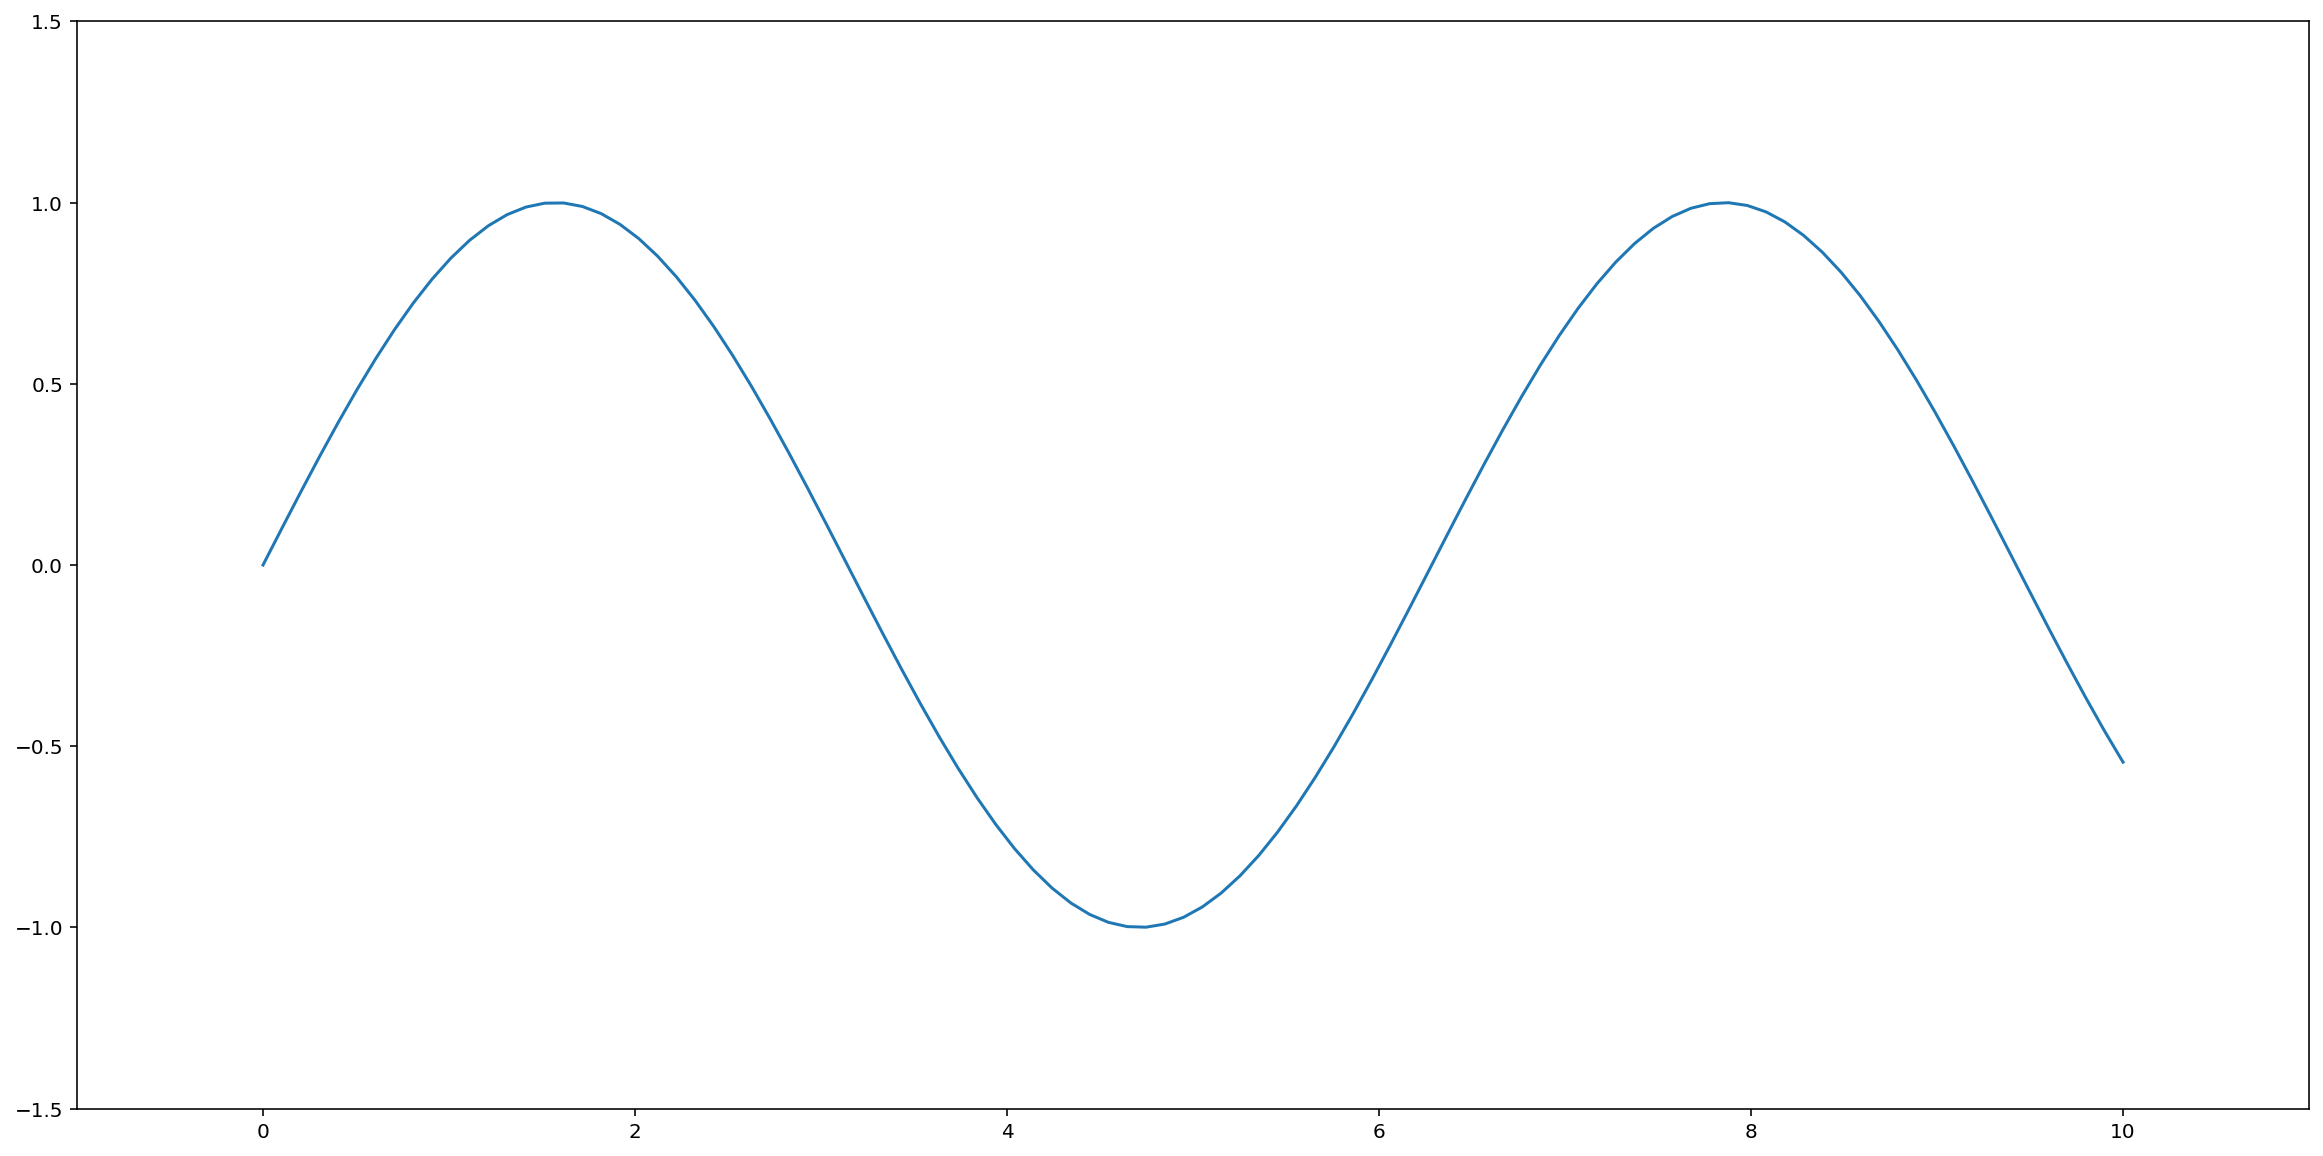

In [13]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

Con el método `axis` podemos dar todos los límites en una sola instrucción. Lo siguiente sería equivalente:

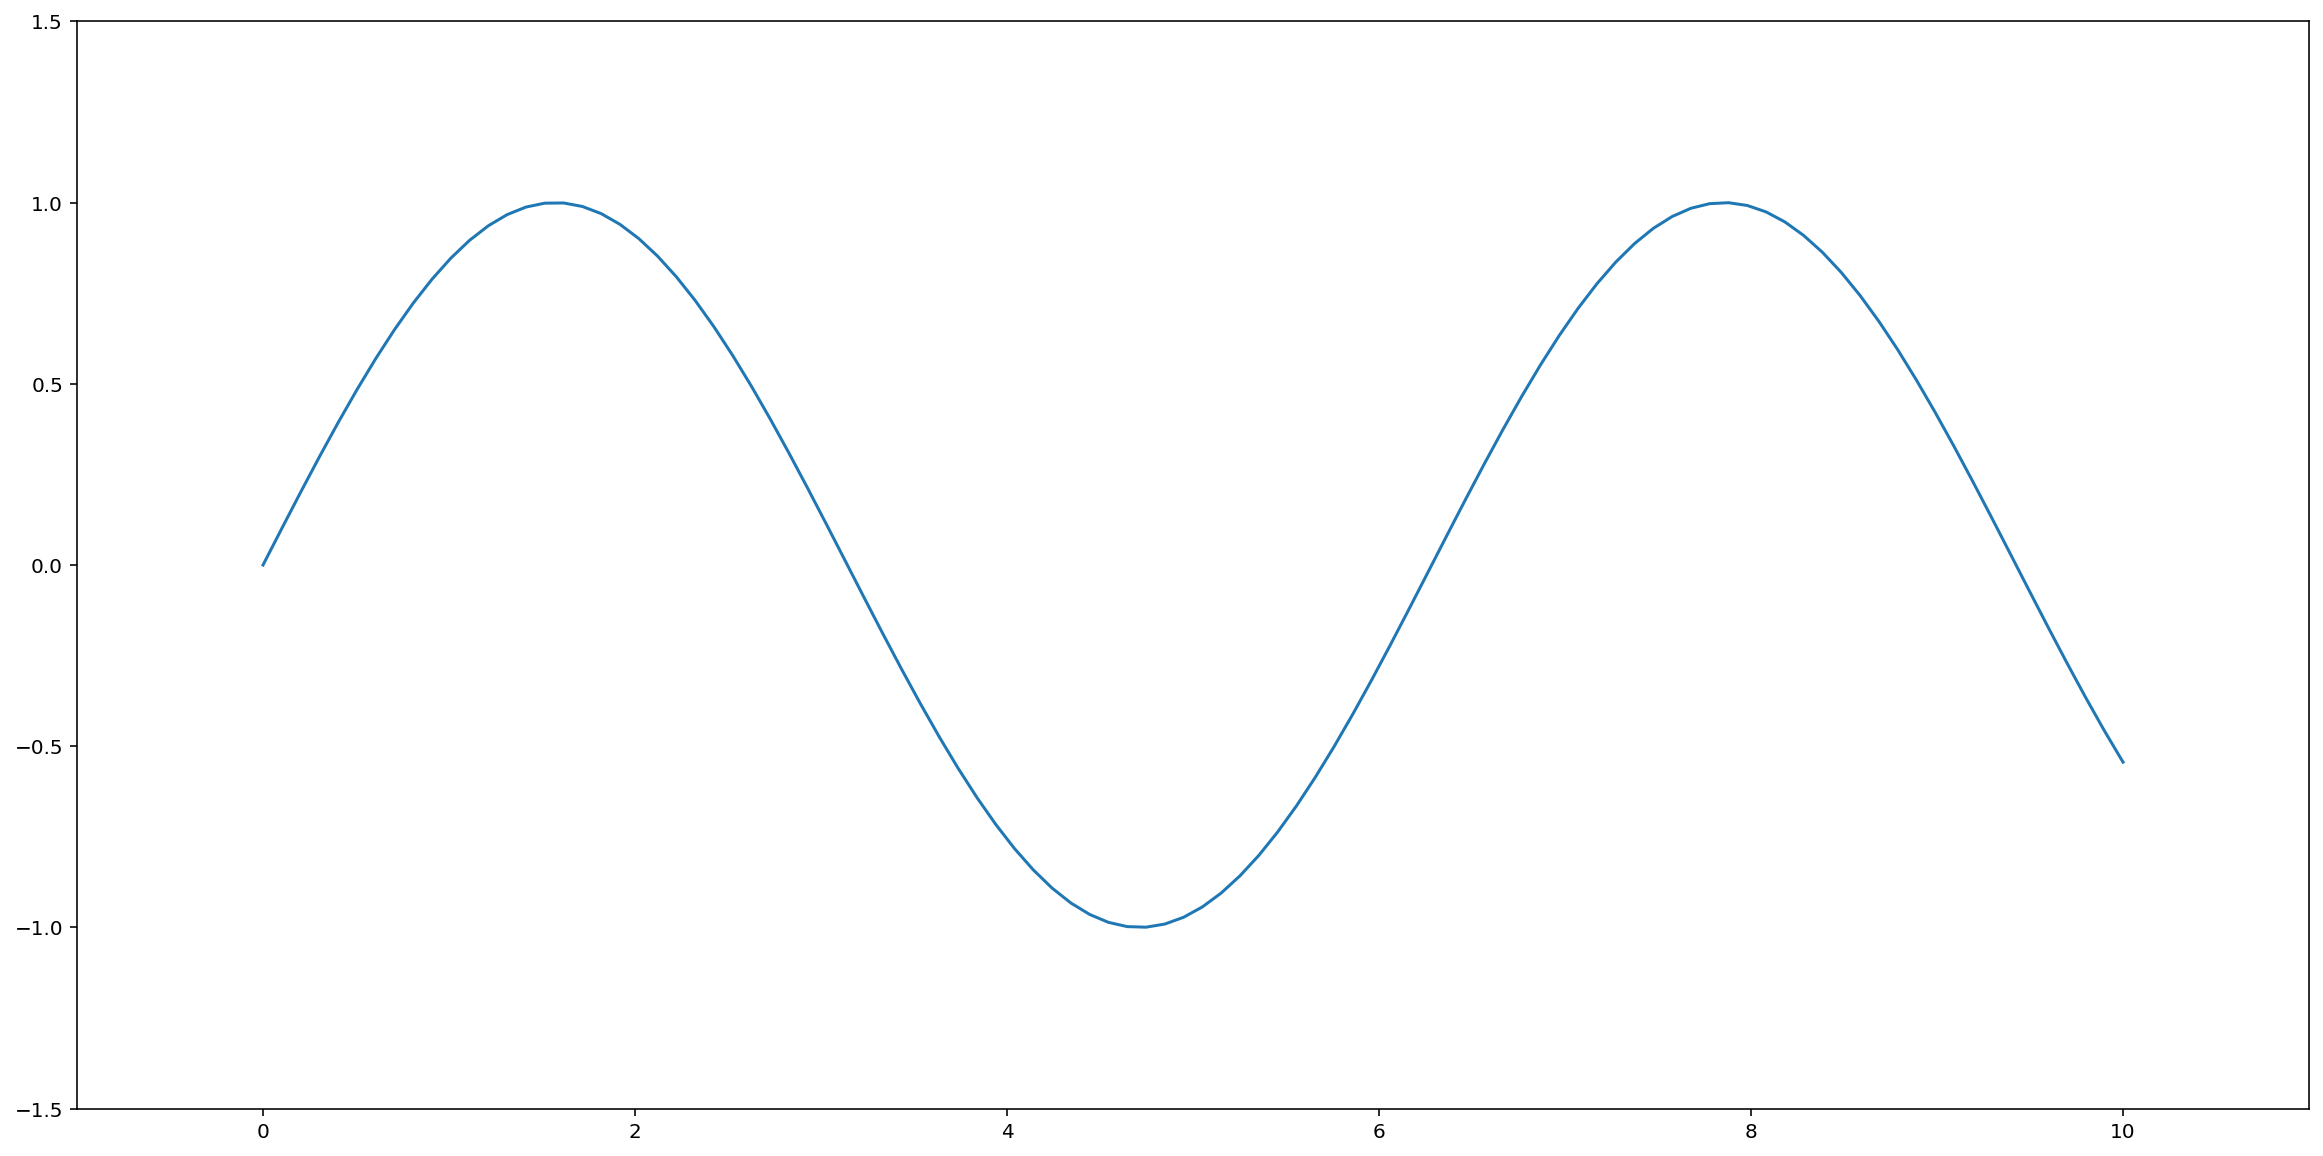

In [14]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Podemos decirle incluso que ajuste al máximo los límites:

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

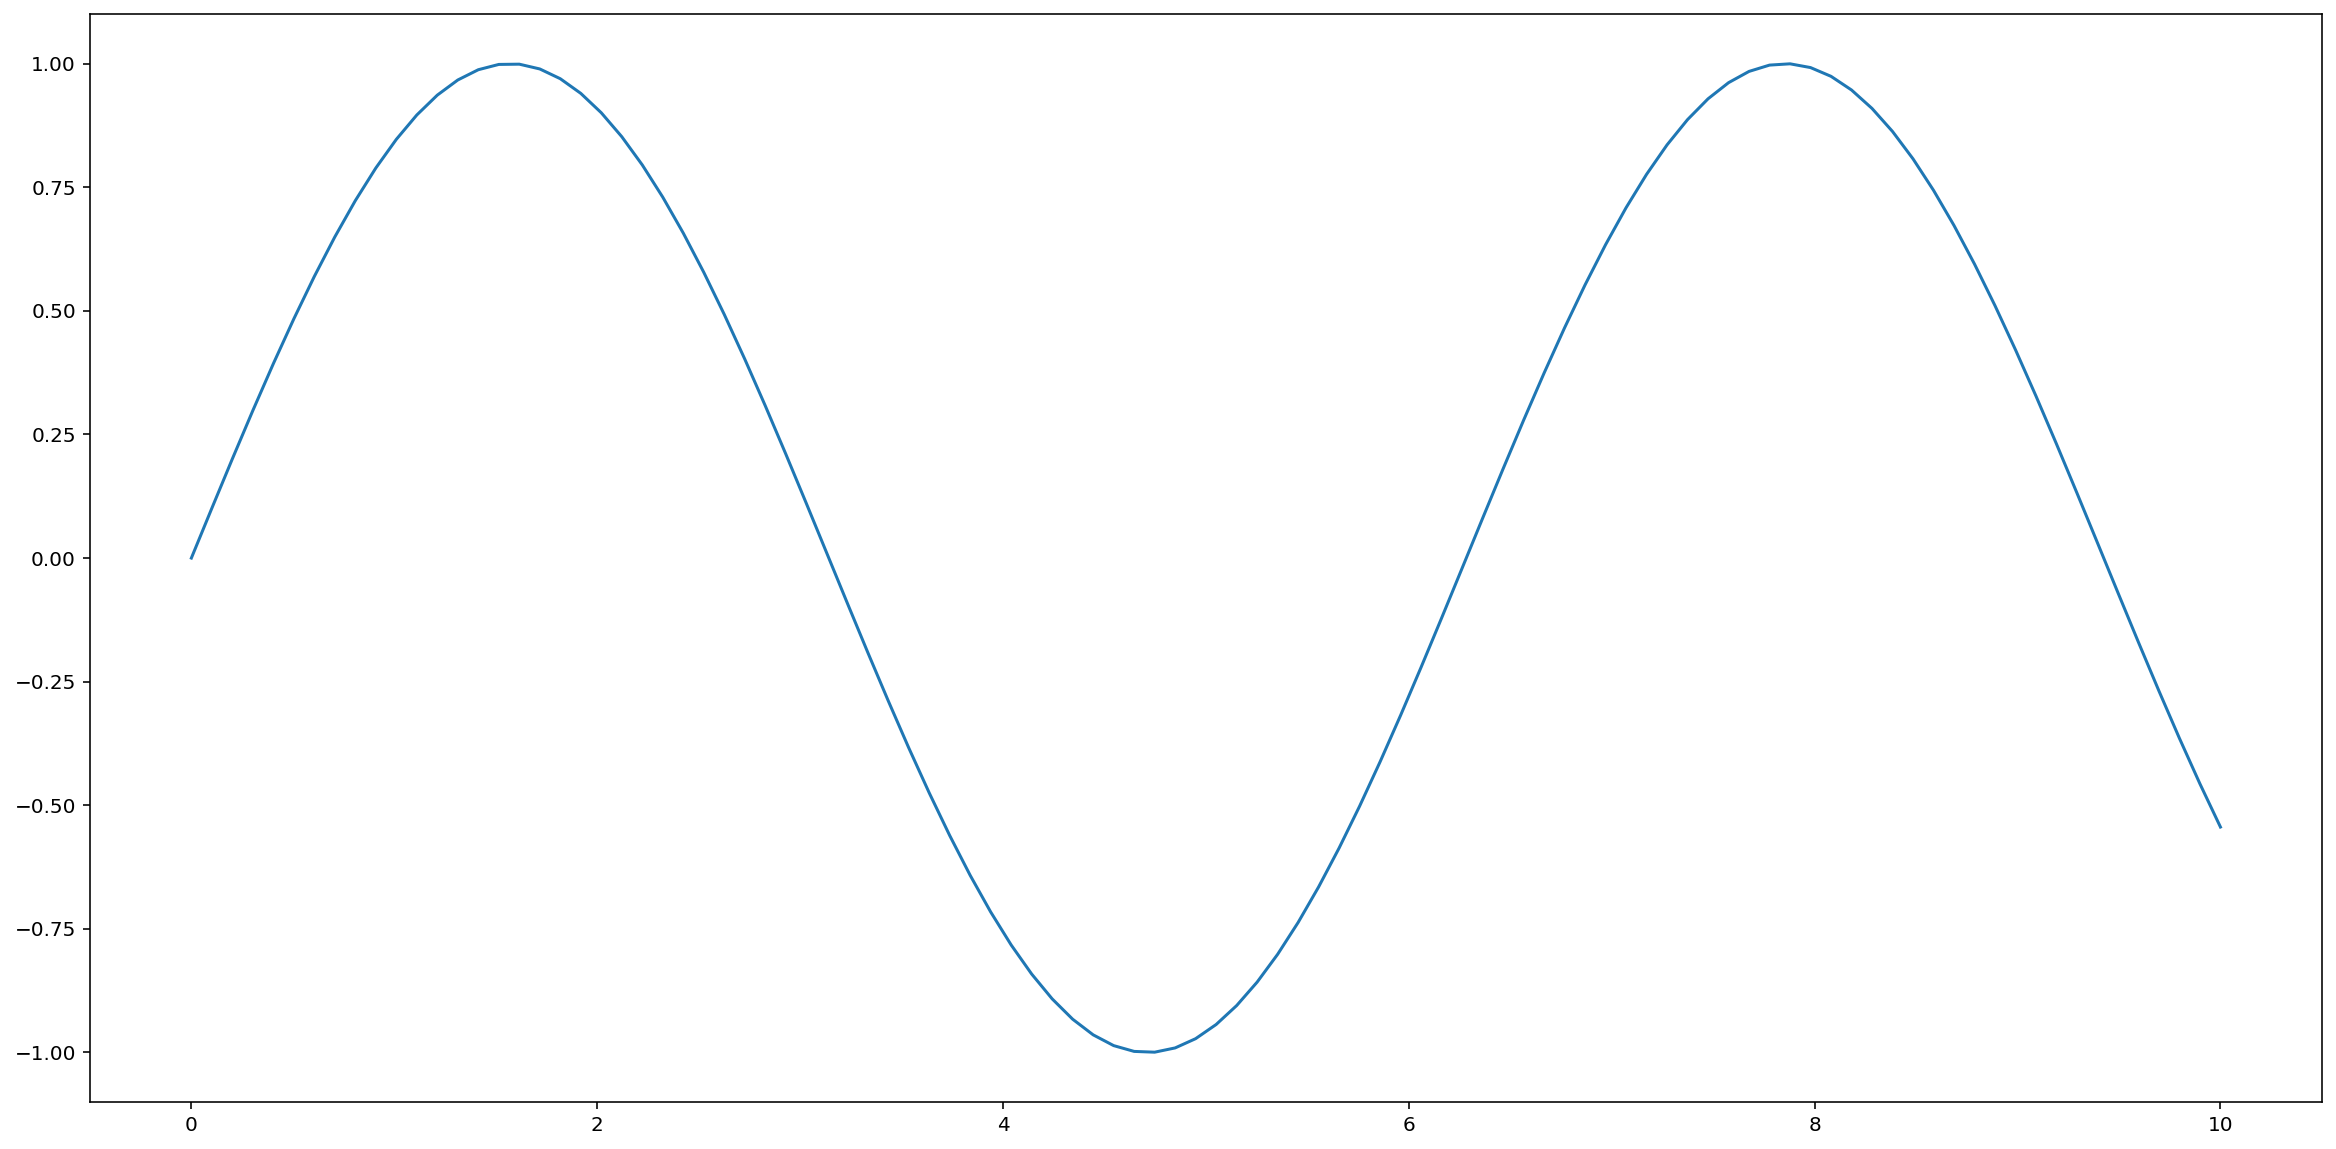

In [15]:
plt.plot(x, np.sin(x))
plt.axis('tight')

O incluse que nos asegure una ratio de aspecto de igual proporcionalidad en ambos ejes:

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

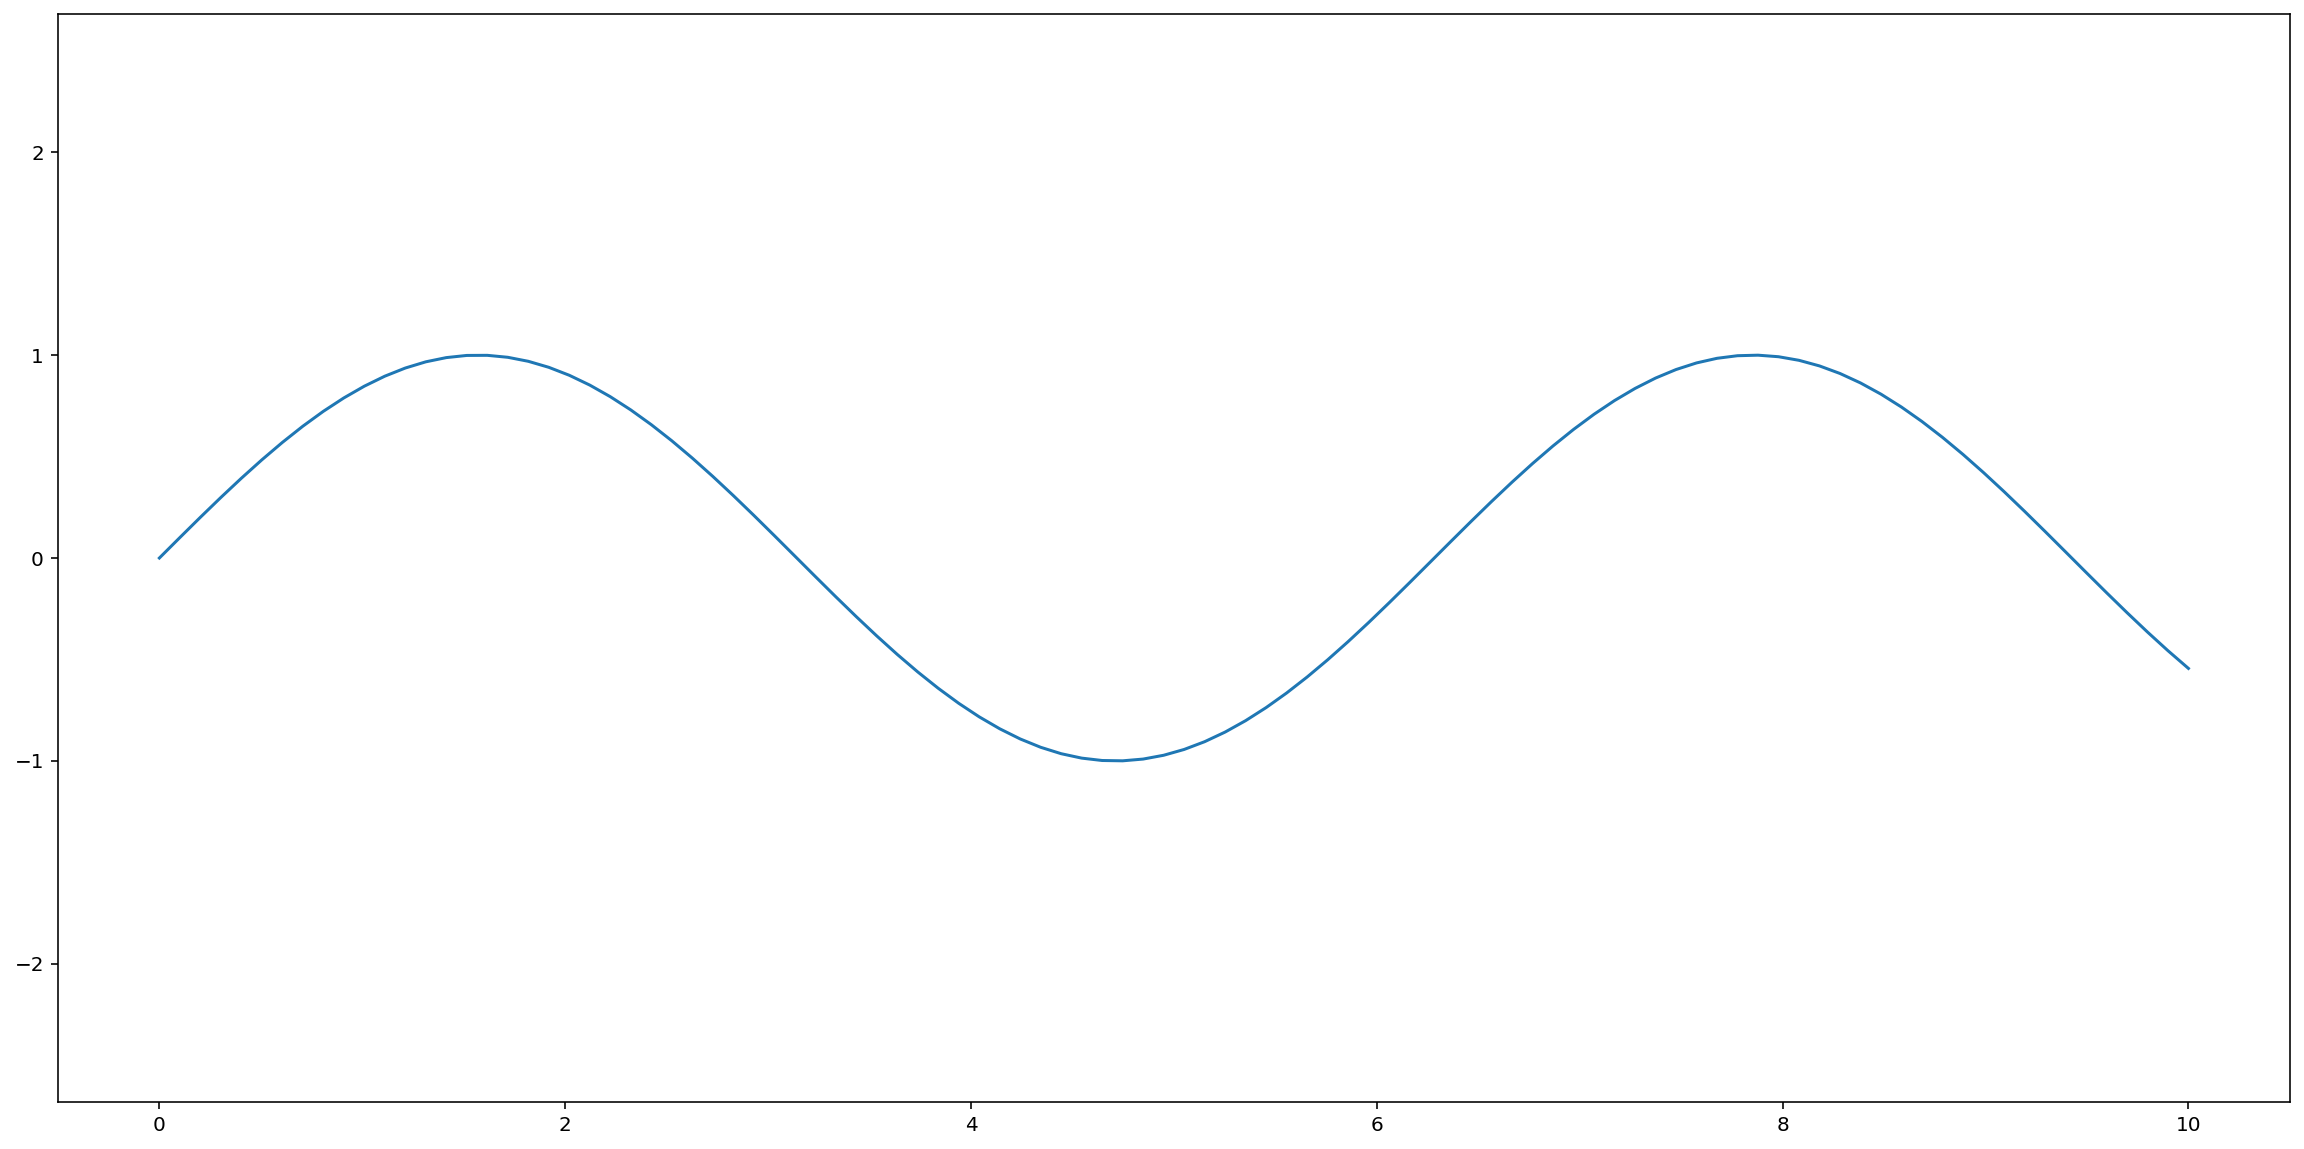

In [16]:
plt.plot(x, np.sin(x))
plt.axis('equal')

Otro punto importante es cómo ponemos etiquetas a distintas parttes de las gráficas. Por ejemplo:

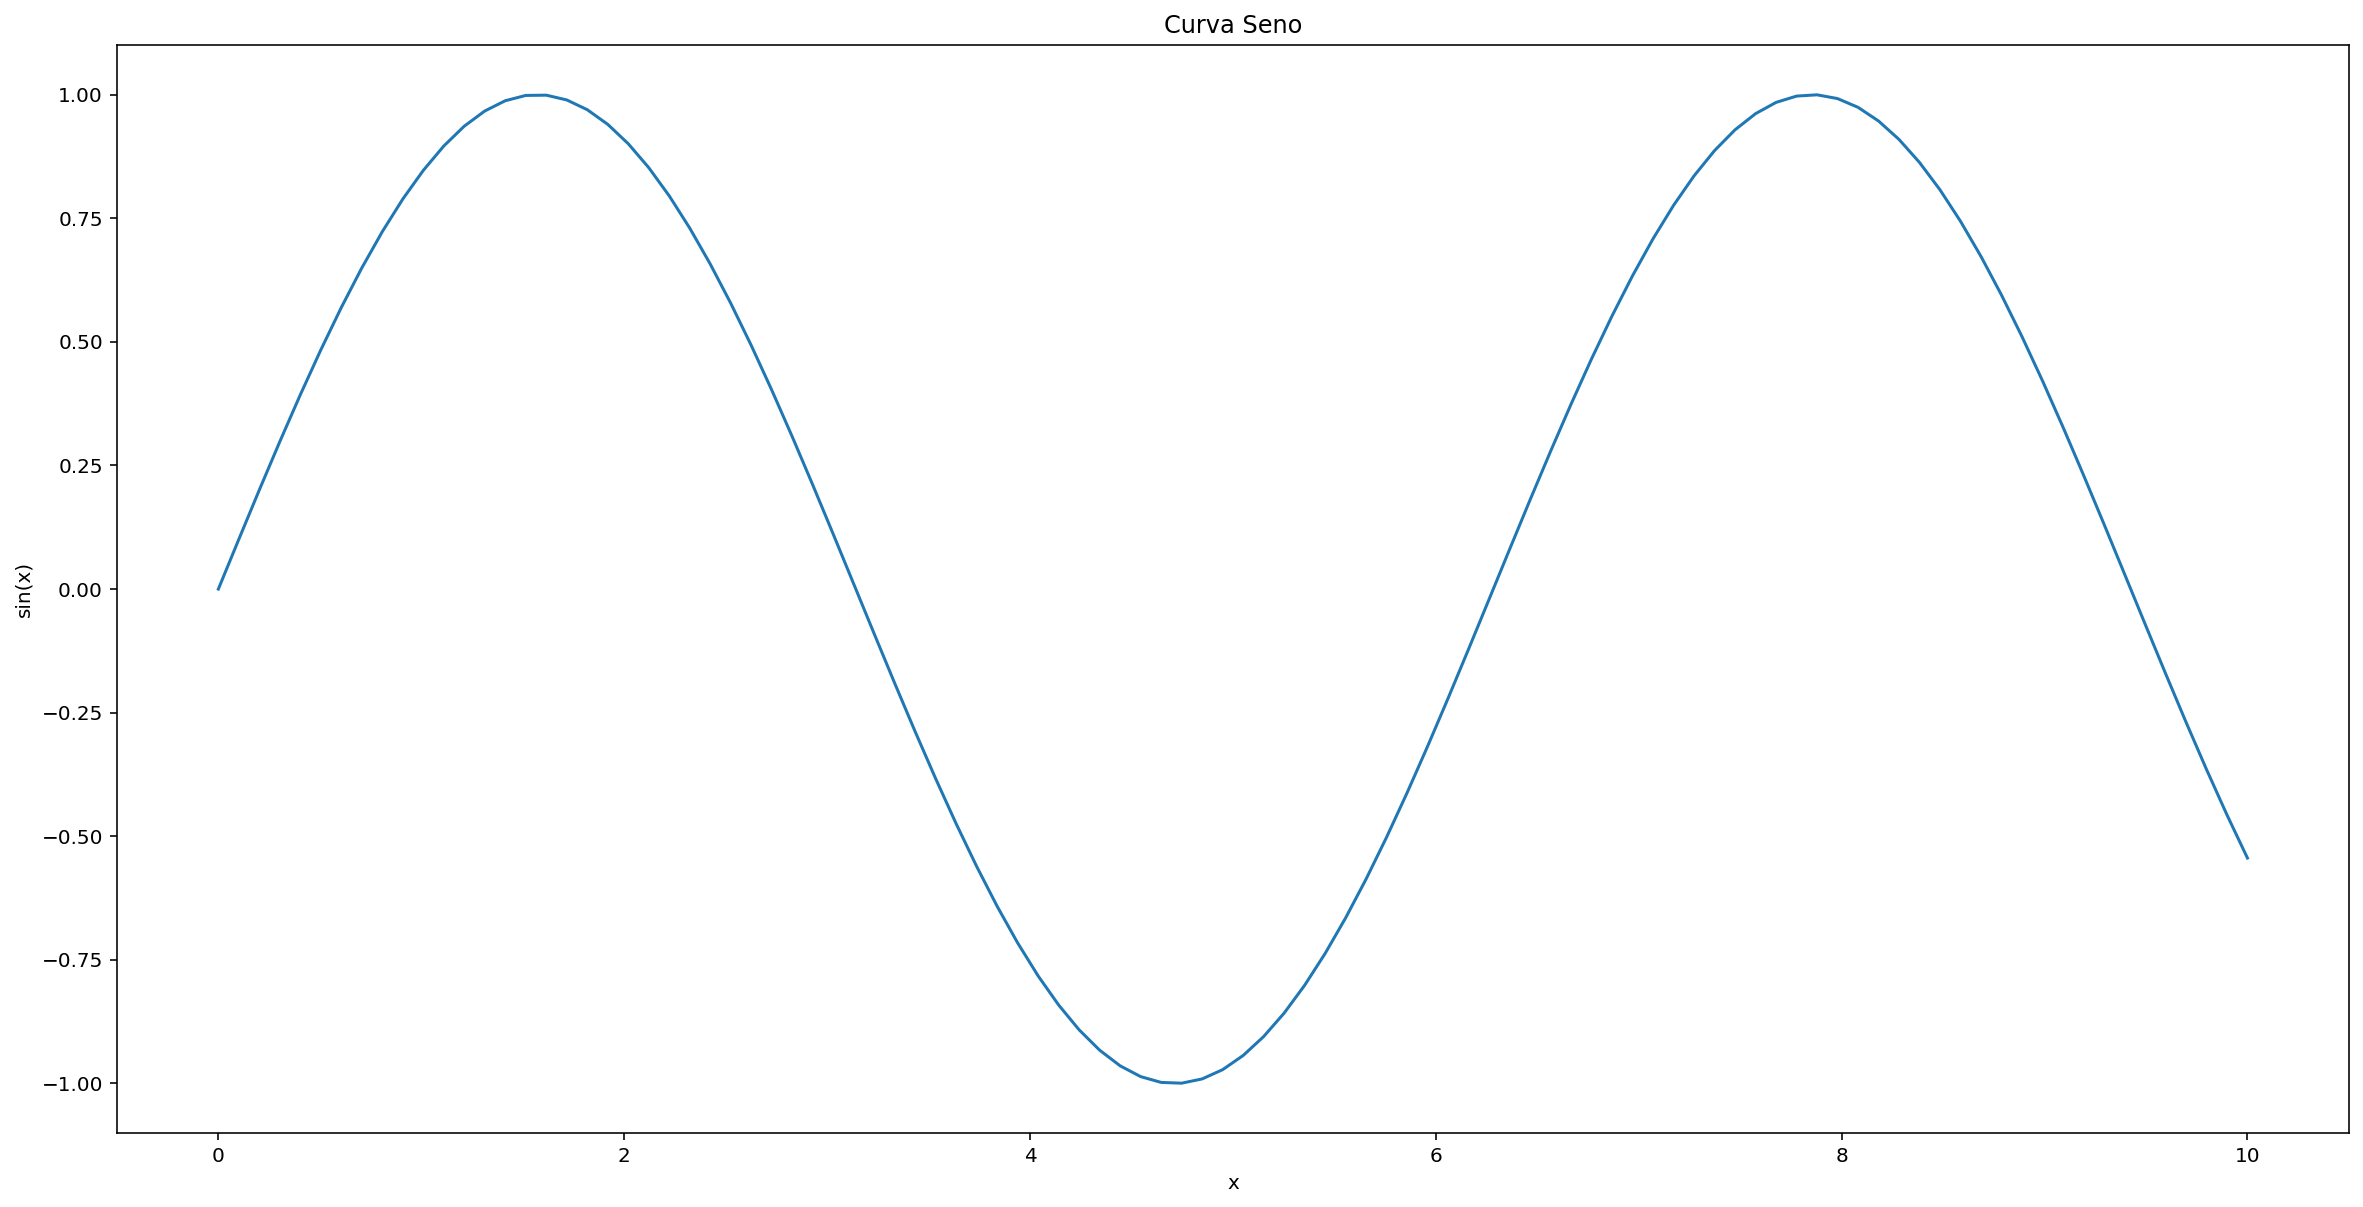

In [17]:
plt.plot(x, np.sin(x))
plt.title("Curva Seno")
plt.xlabel("x")
plt.ylabel("sin(x)");

Cuando se muestran múltiples líneas en una sola caja, puede ser útil mostrar una "leyenda" para cada línea. Esto se consigue mediente `plt.legend()`. Nótese también que especificamos la etiqueta de cada línea con el keyword correspondiente en plot.

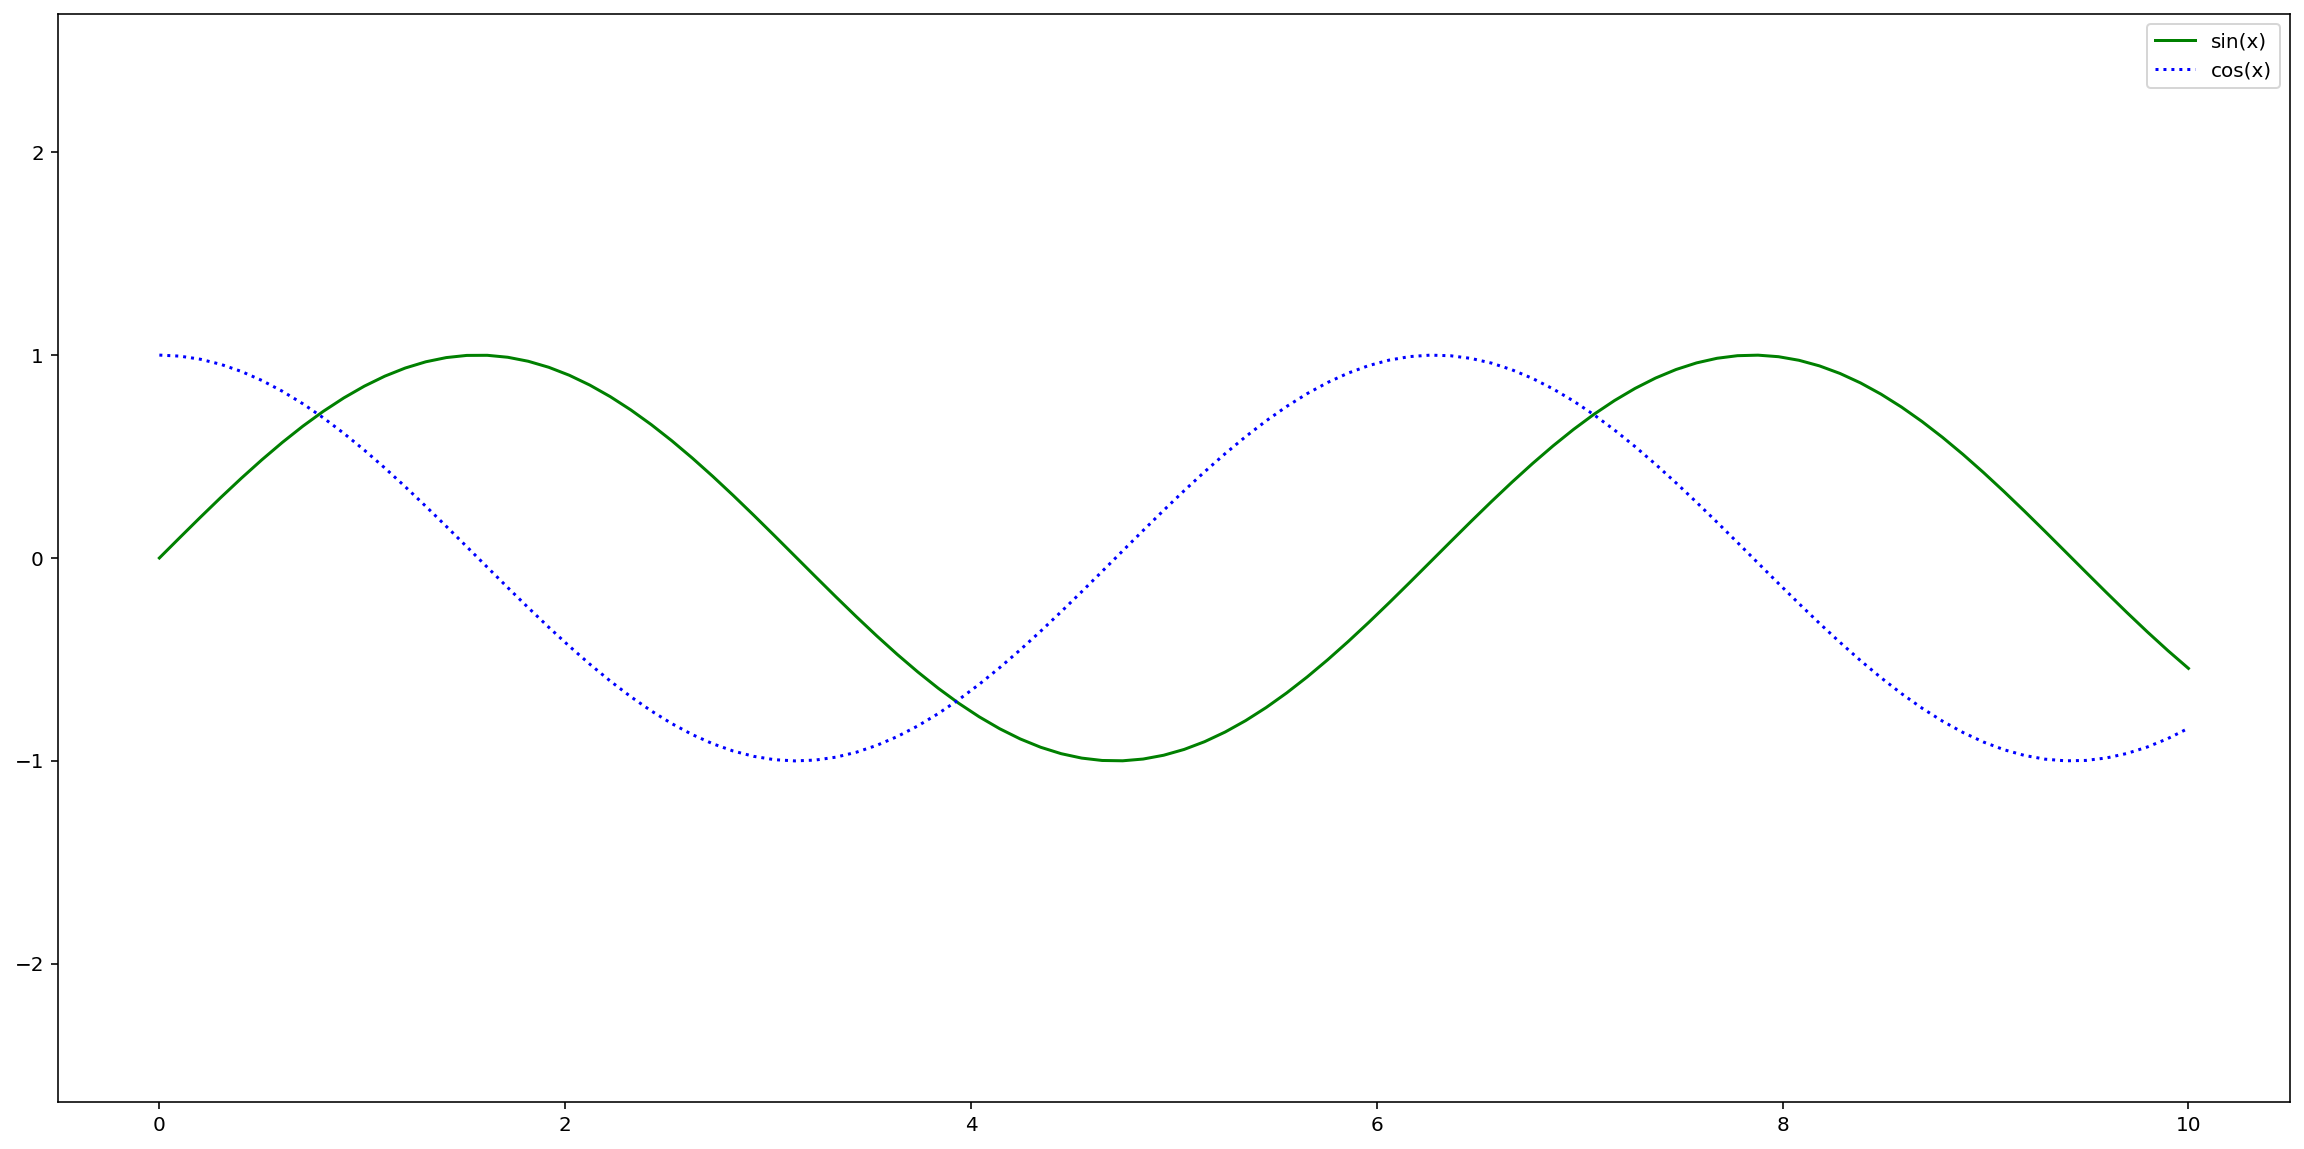

In [18]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Nubes de puntos 

Otra gráfica muy básica dentro de matplotlib son las nubes de puntos. En lugar de unir los puntos con líneas como con `plot`, se representa cada punto de manera individual, con su propia estructura. Lo haremos con el método `scatter`.

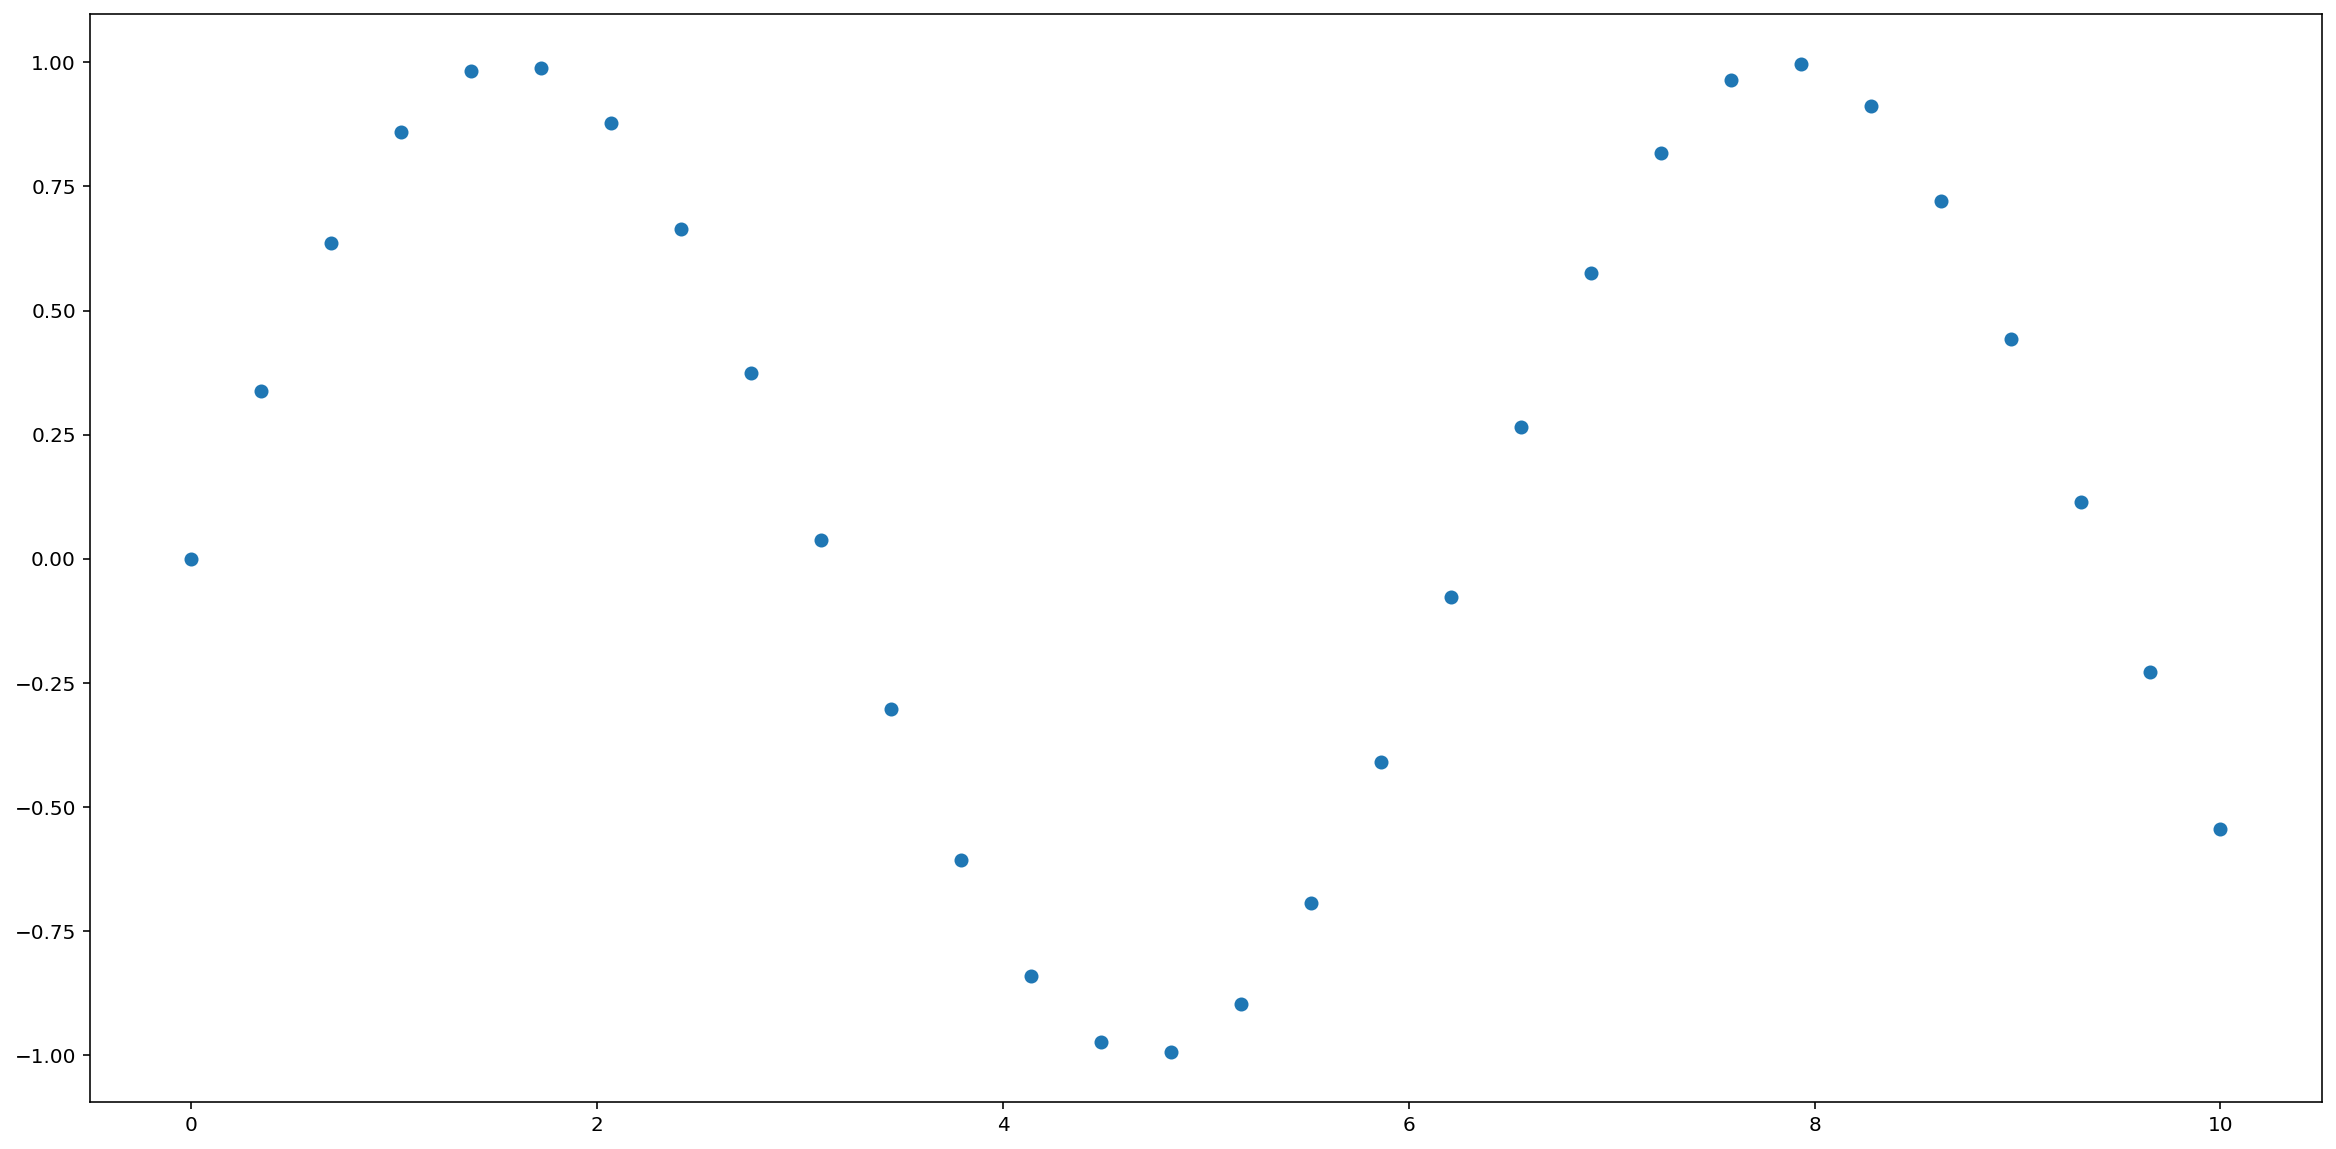

In [19]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker='o')

El parámetro clave `marker` indica la forma del punto (en este caso, un círculo). Aefectos ilustrativos, la siguiente figura muestra distintos códigos para esa marca y el aspacto que tienen:

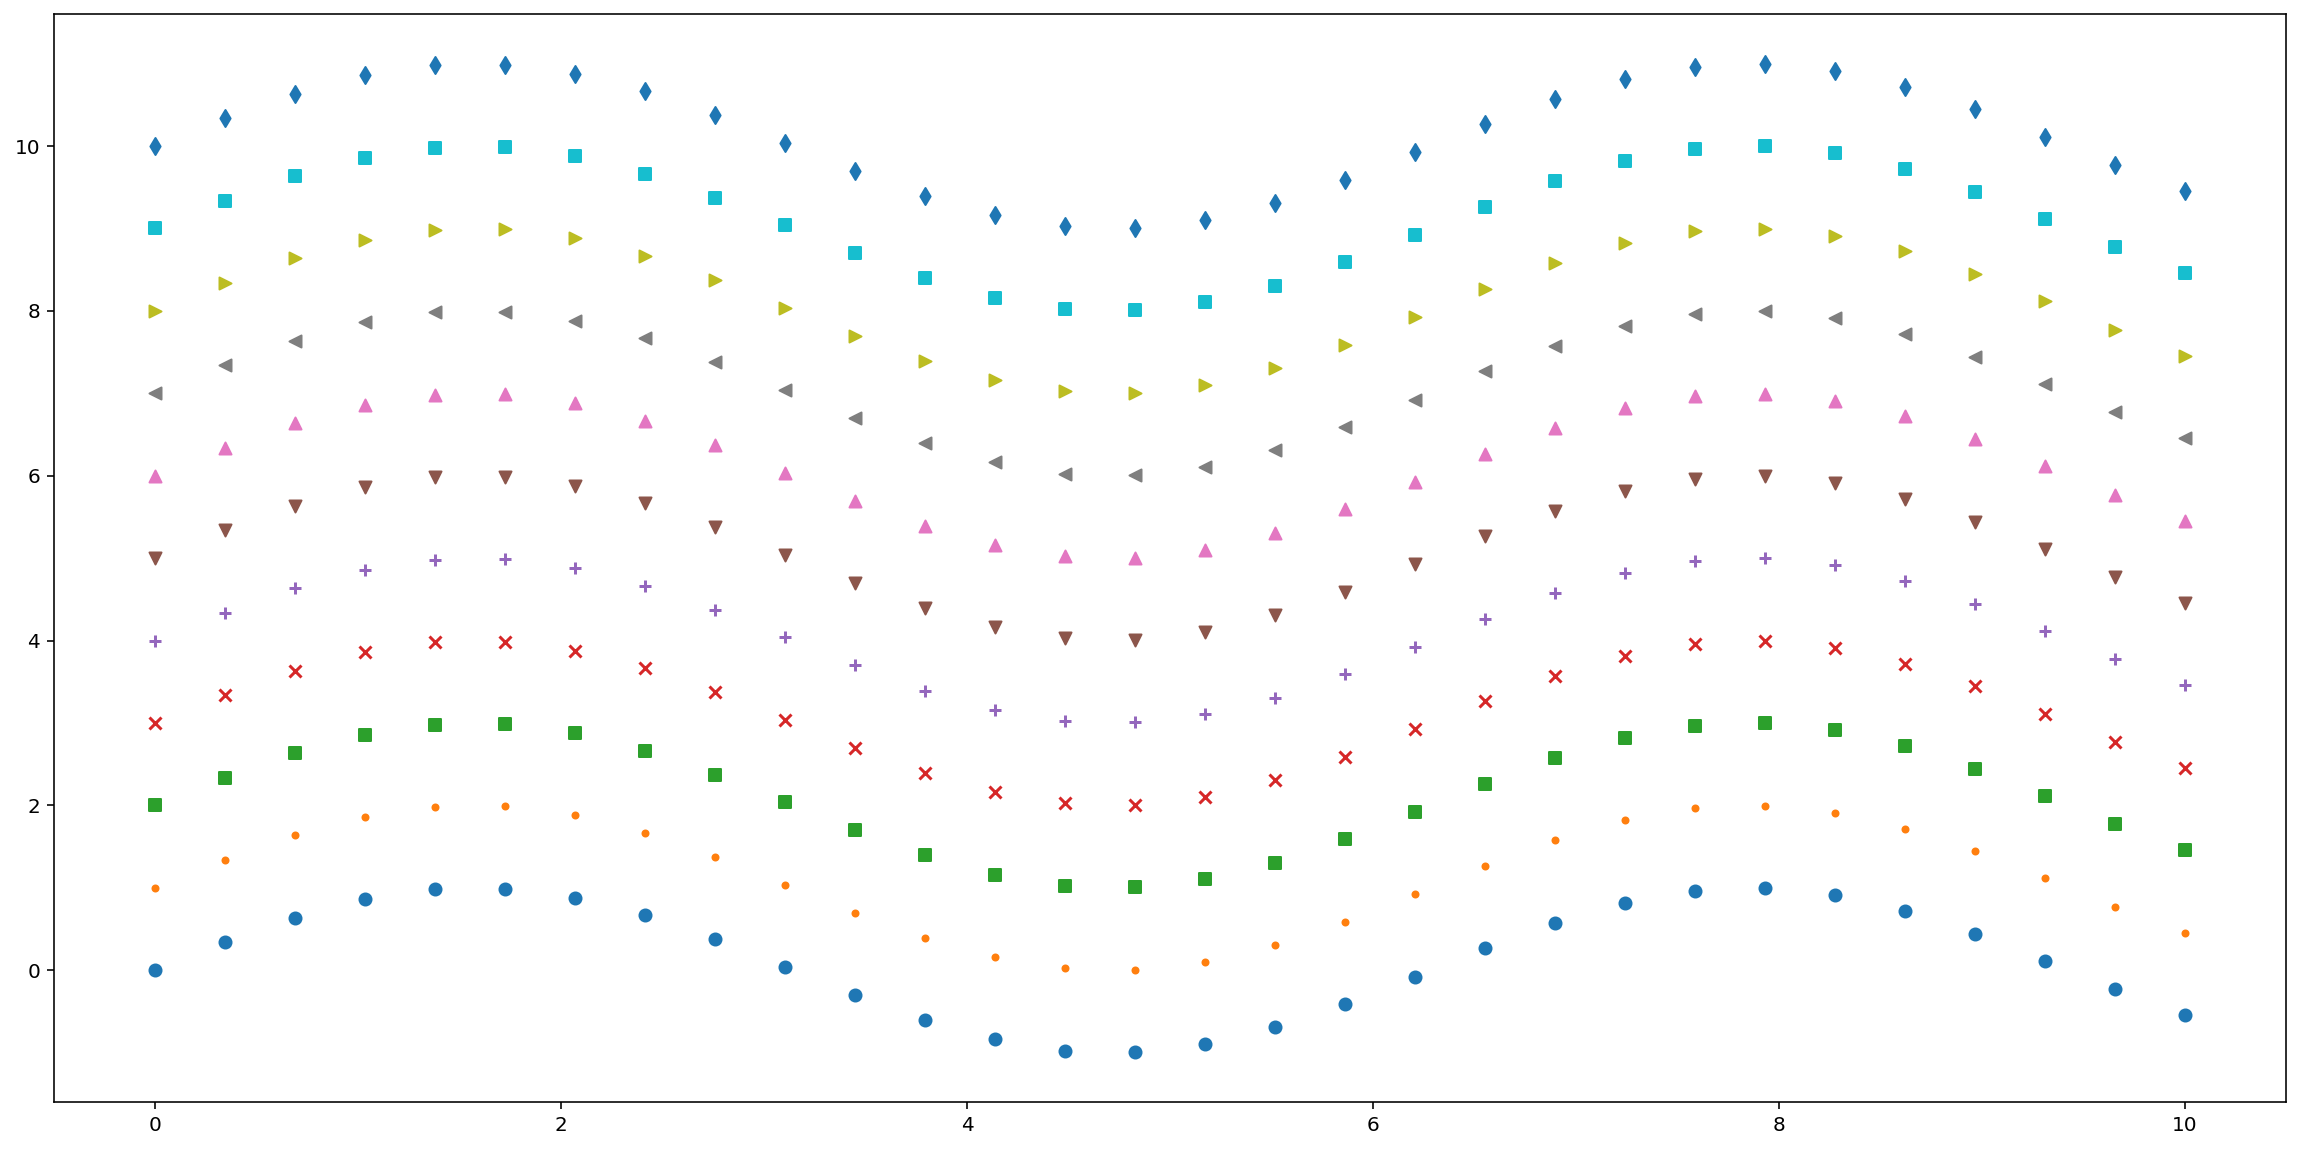

In [20]:
for i,marker in enumerate(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']):
    plt.scatter(x, y+i, marker=marker)

## Gráficas con pandas

Los objetos pandas (*Series* y *DataFrames*) vienen "equipados" con el atributo `plot`que permite ser una serie de gráficos básicos. Veamos algunos ejemplos simples:

### Gráficas de líneas

Por defecto, `plot` en un objeto pandas crea un a gráfica al estilo del `plot`de matplotlib:

Por ejemplo, para una serie:

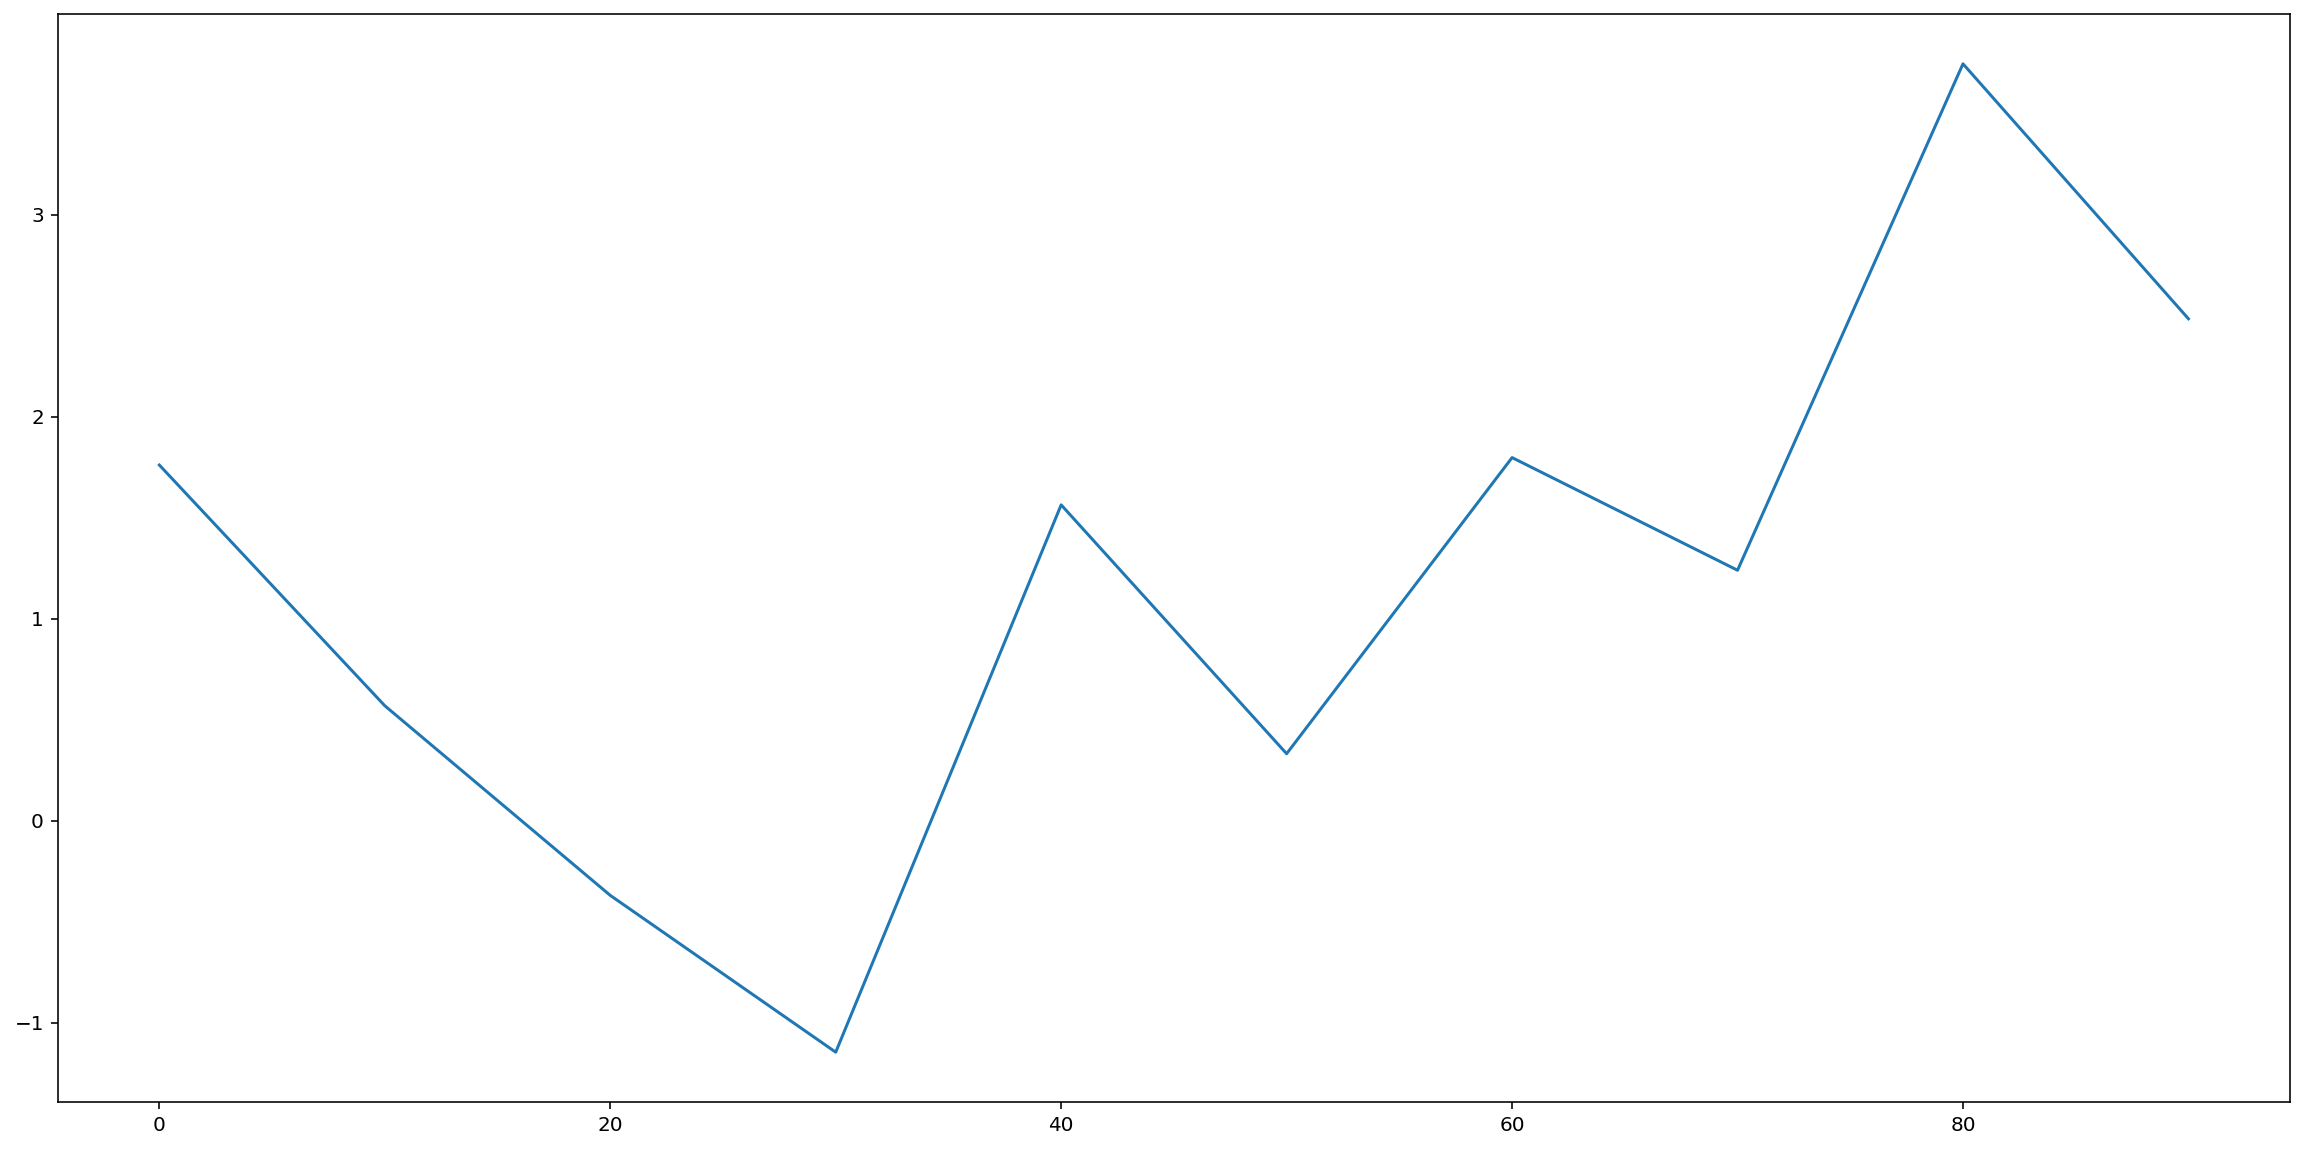

In [21]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

El método `plot` tiene muchas opciones, se recomienda consultar el manual.

Para un *DataFrame*, se crea una línea por cada columna, como se muestra en el siguiente ejemplo. Nótese que los límites, colores, leyendas,... se han ajustado automáticamente. 

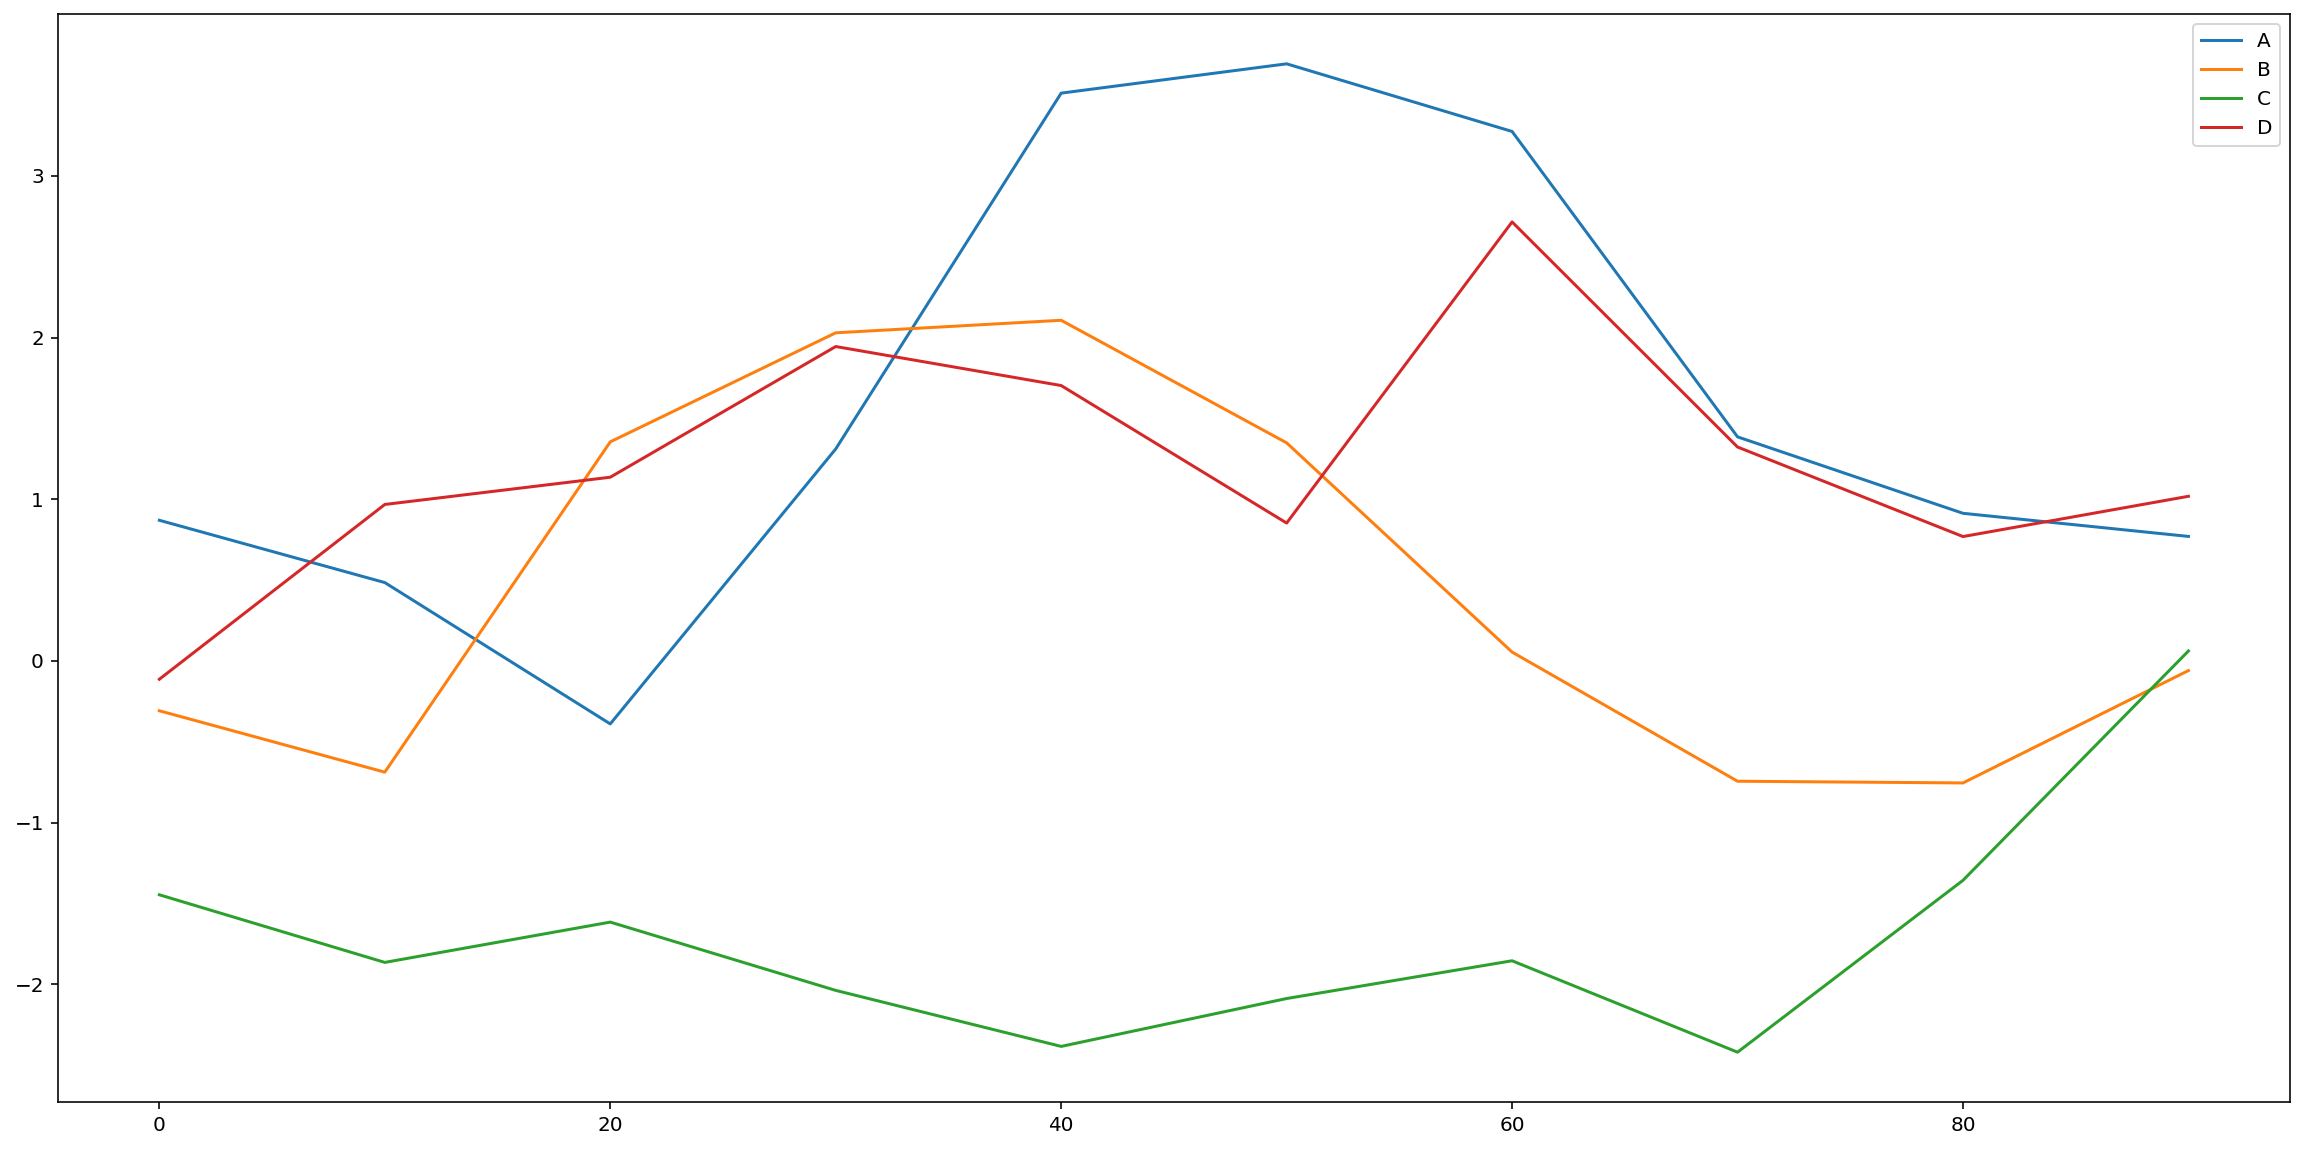

In [22]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

## Diagramas de barras

Con `bar`y `barh` de `plot`, podemos hacer diagrmas de barras tanto verticales como horizontales:

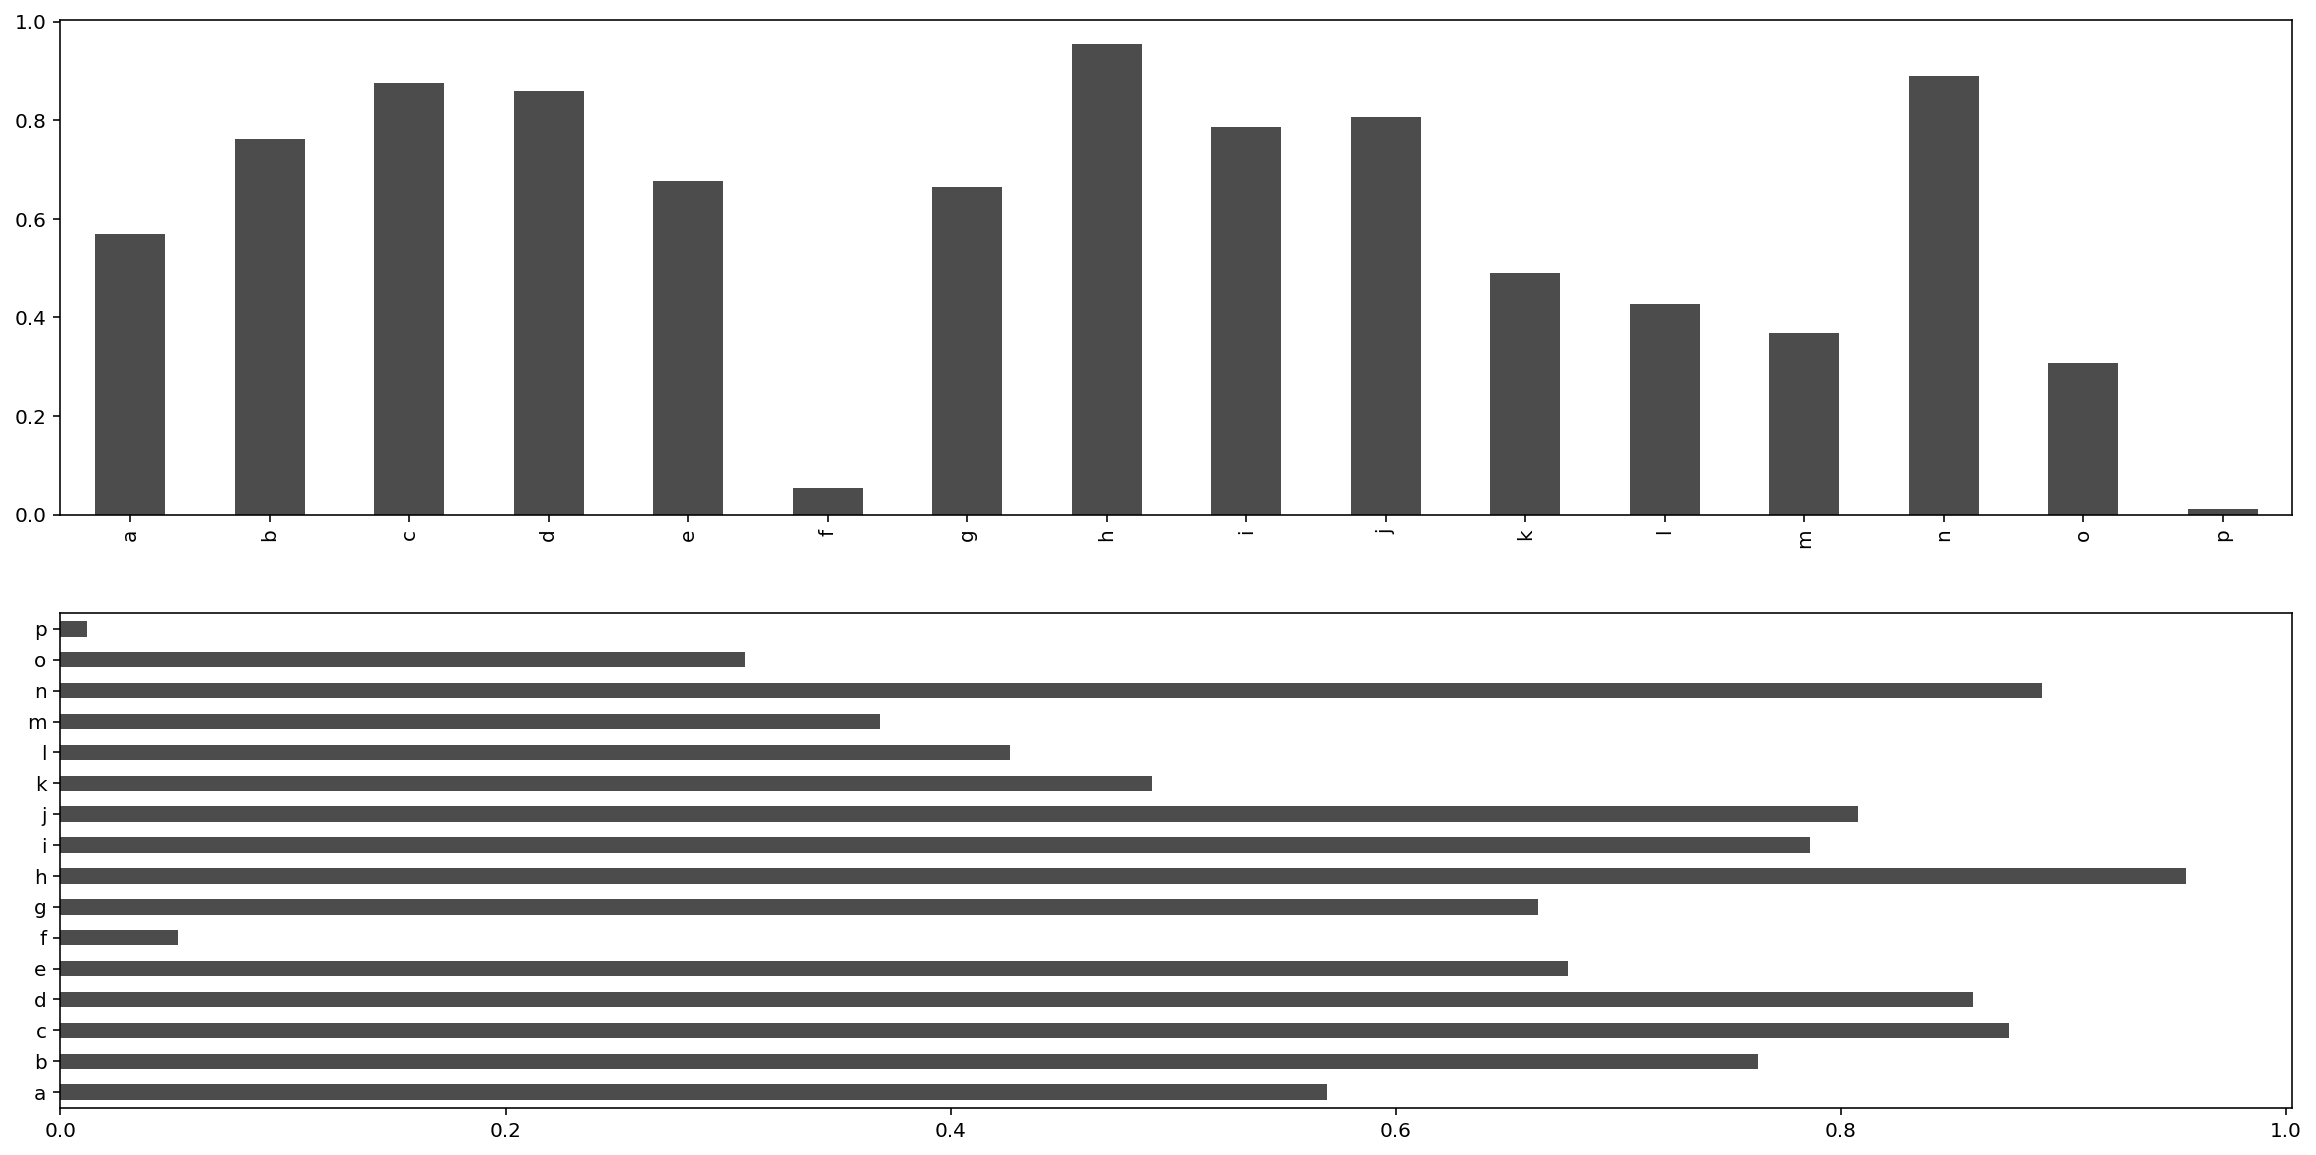

In [23]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7) # alpha es el grado de transparencia
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [24]:
np.random.seed(12348)

Con *DataFrames*, se crea una agrupación de barras por cada fila, como se ve en el siguiente ejemplo. Nótese de nuevo cómo los colores, límites, etiquetas, leyendas,... se han ajustado automáticamente.

In [25]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


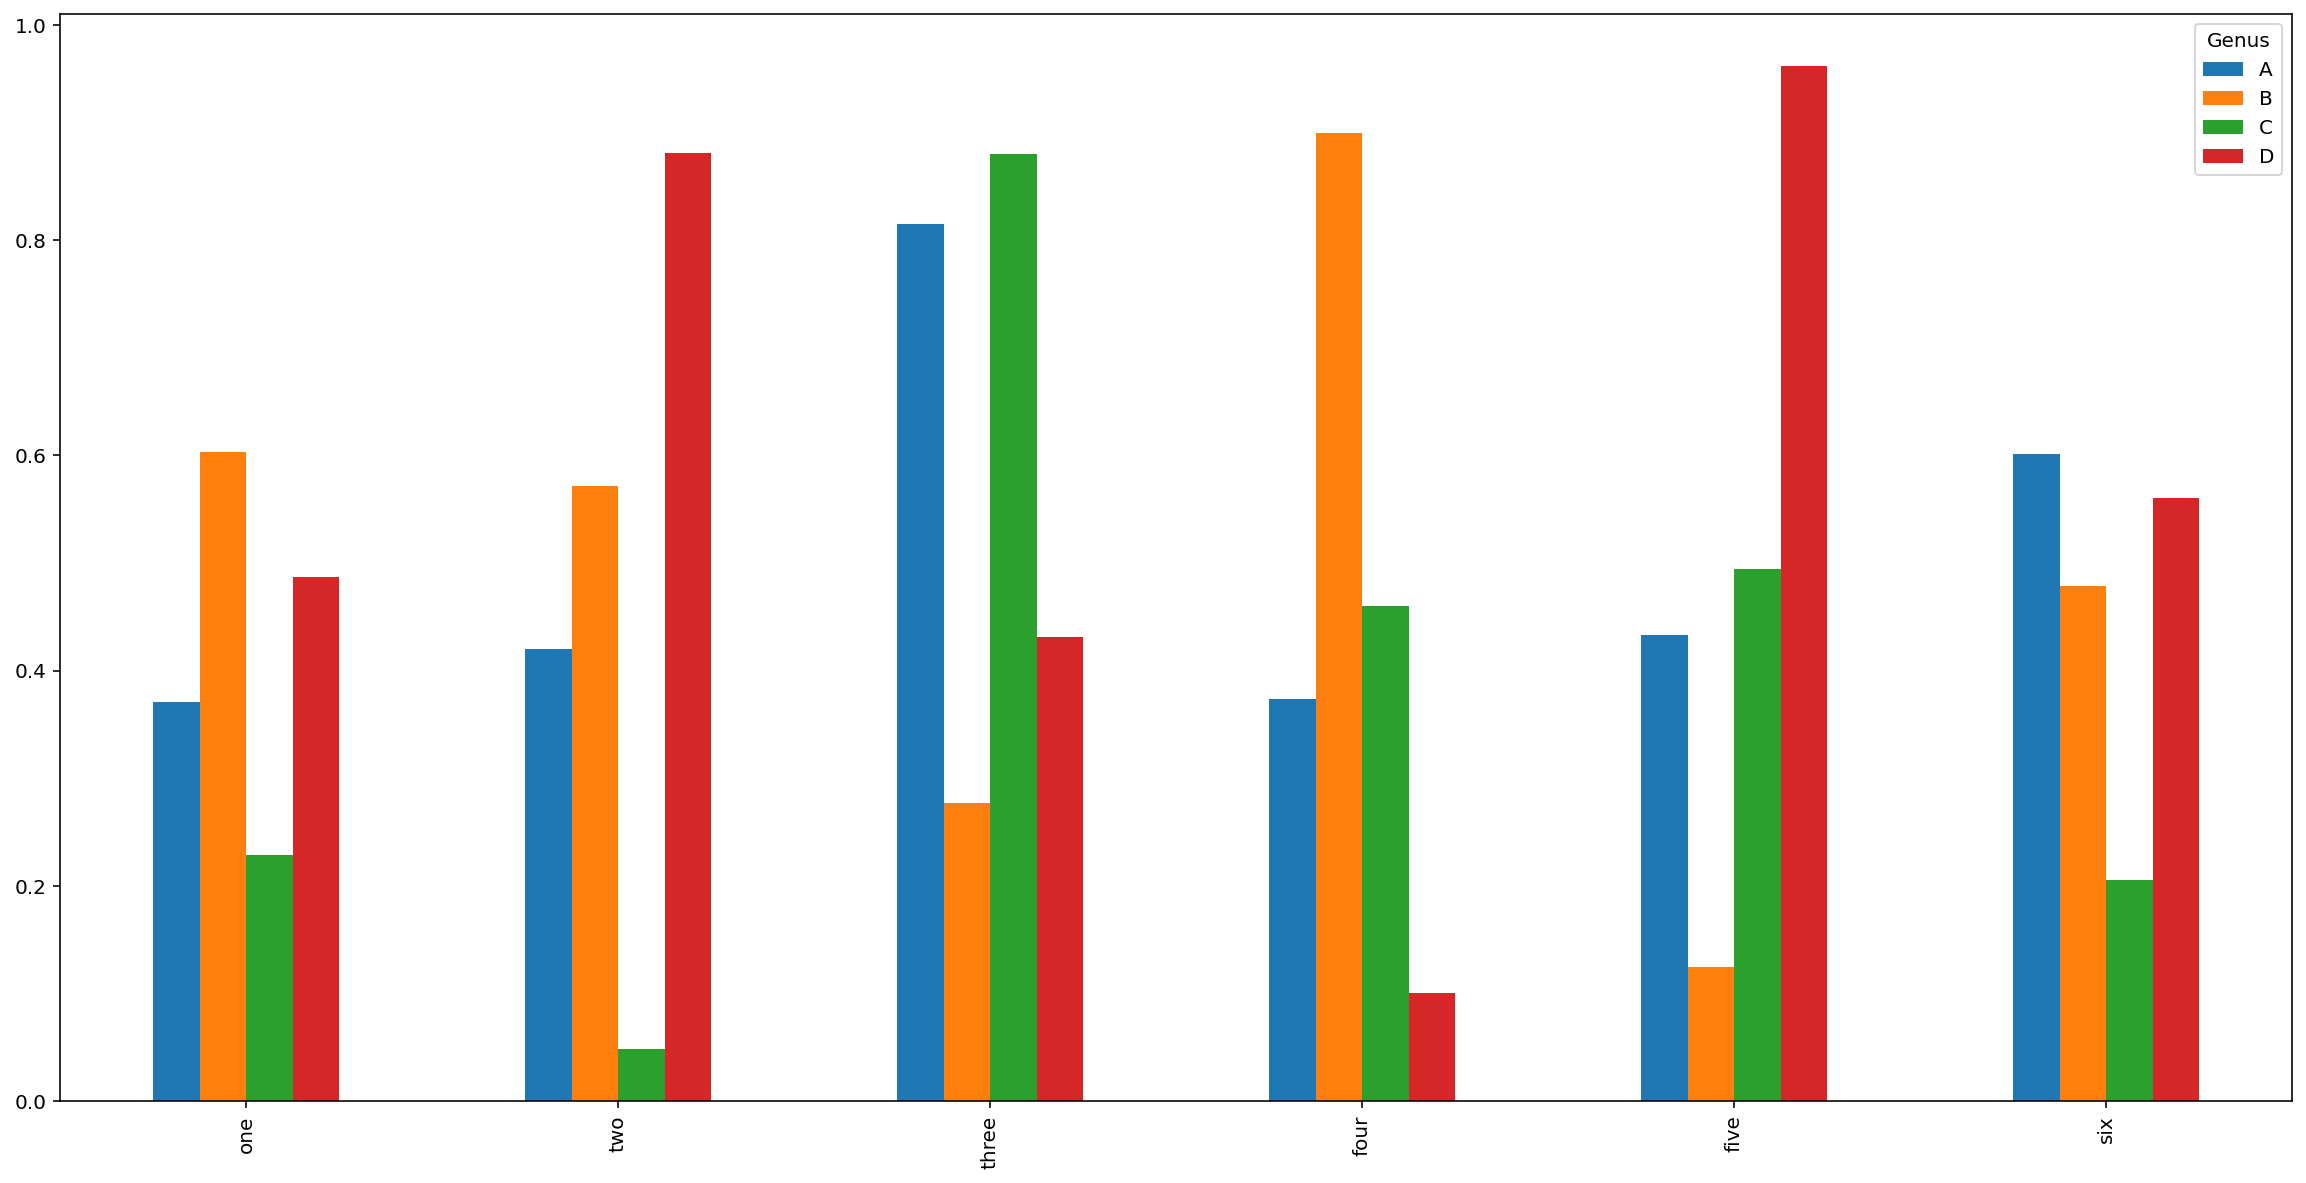

In [26]:
df.plot.bar()

In [27]:
plt.figure()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Para barras horizontales es la misma idea, pero en este caso las barras se apilan una a continuación de otra.

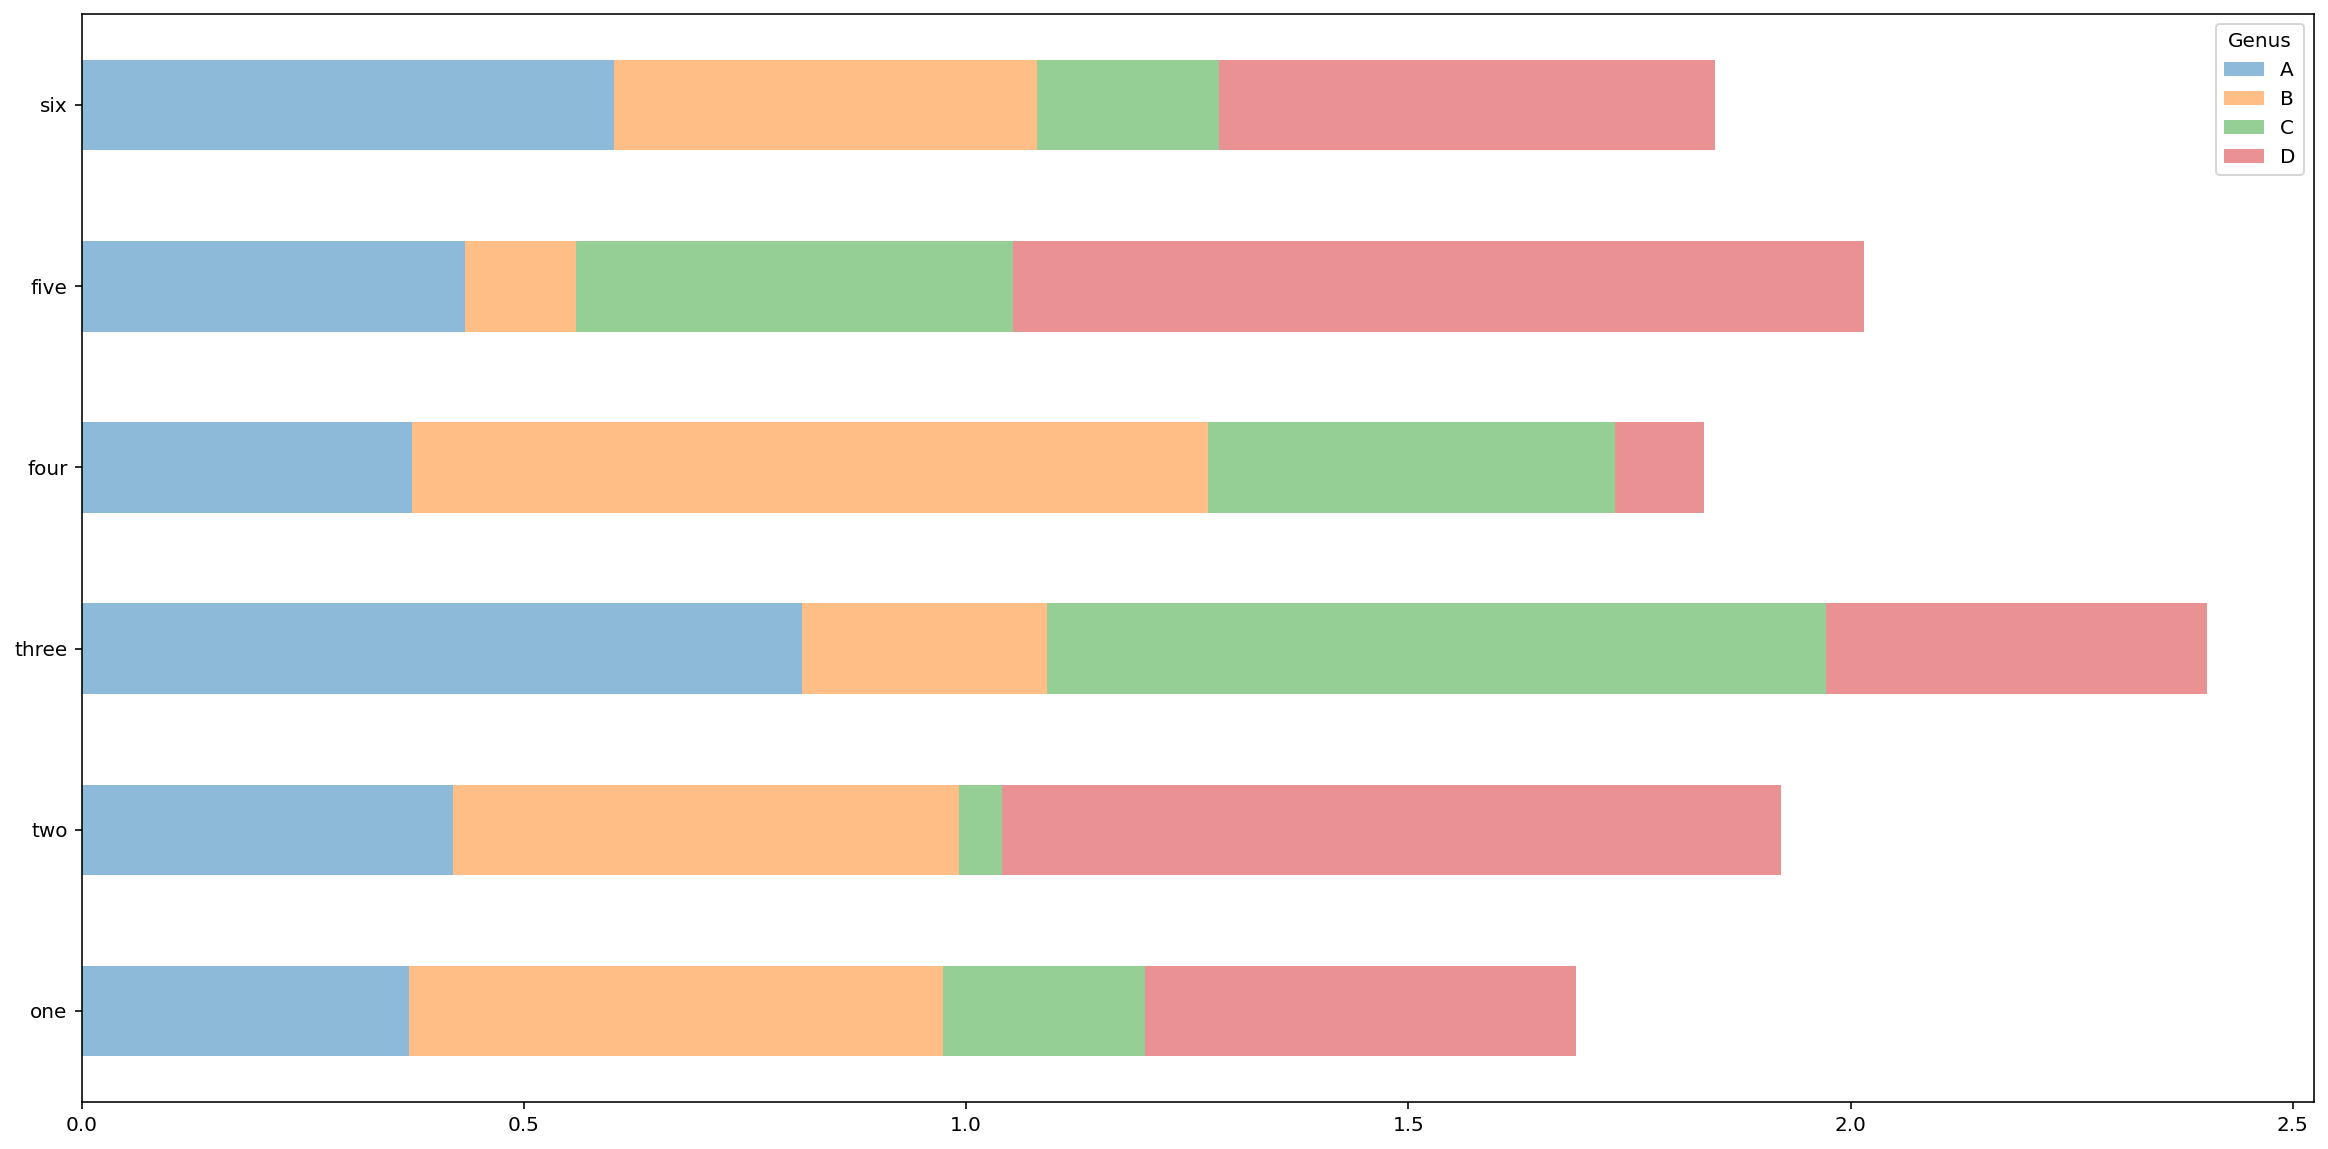

In [28]:
df.plot.barh(stacked=True, alpha=0.5)

In [29]:
plt.close('all')